# 군집분석 성능평가

> iris 데이터셋

## #01. 준비작업

### [1] 패키지 가져오기

In [2]:
%load_ext autoreload
%autoreload 2

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# 내장컬러맵, 처리 유틸리티
from matplotlib import cm


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### [2] 데이터 가져오기

In [3]:
origin : DataFrame =  my_read_excel('C:/Users/Jihwan/Desktop/01Class/E.추론통계,머신러닝/수업자료/iris.xlsx',
                                    categories=['Species'], info=False)

## #02. 데이터 전처리

### [1] MinMax Scaling

In [4]:
df = my_minmax_scaler(origin, yname='Species')
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,virginica
146,0.555556,0.208333,0.677966,0.750000,virginica
147,0.611111,0.416667,0.711864,0.791667,virginica
148,0.527778,0.583333,0.745763,0.916667,virginica


## #03. 클러스터링

### [1] 클러스터링 군집 모형 구현

#### (1) 종속변수를 제외한 나머지 변수 추출

In [5]:
df2 = df.drop('Species', axis=1)
df2

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


#### (2) 군집 모형 구현

In [6]:
estimator = KMeans(n_clusters=3, random_state=333)
estimator.fit(df2)

KMeans(n_clusters=3, random_state=333)

#### (3) 군집화 결과를 데이터프레임에 추가

In [7]:
cluster = estimator.predict(df2)

result_df = df2.copy()
result_df['cluster'] = cluster
result_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,cluster
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,0
146,0.555556,0.208333,0.677966,0.750000,0
147,0.611111,0.416667,0.711864,0.791667,0
148,0.527778,0.583333,0.745763,0.916667,0


#### (4) 각 군집의 중심점

In [8]:
estimator.cluster_centers_

array([[0.66773504, 0.44310897, 0.7571708 , 0.78205128],
       [0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.41203704, 0.27690972, 0.55896893, 0.52083333]])

### [2] 군집 결과 시각화

중심점 좌표 추가함

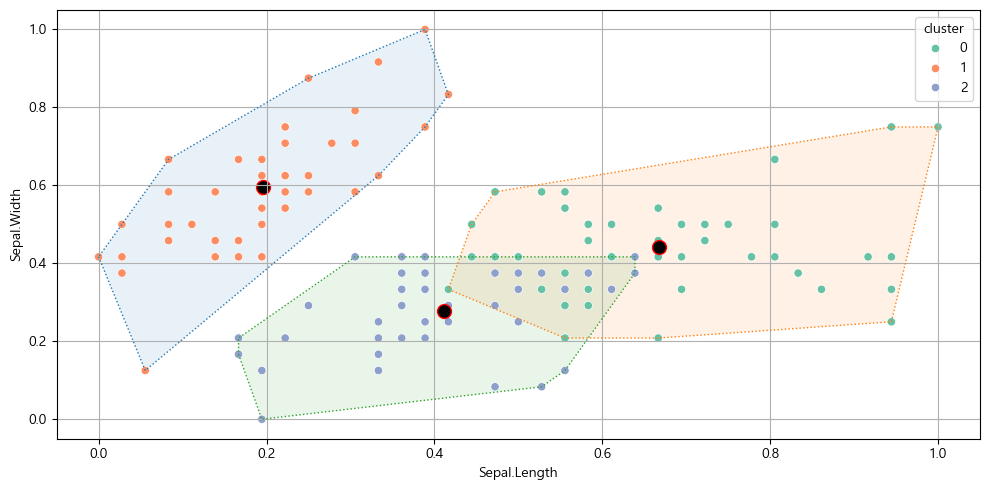

In [9]:
my_convex_hull(data=result_df, xname='Sepal.Length', yname='Sepal.Width', hue='cluster',palette='Set2',
                    callback = lambda ax: ax.scatter(
                        estimator.cluster_centers_[:, 0],
                        estimator.cluster_centers_[:, 1],
                        marker='o',
                        c='black',
                        alpha=1,
                        s=100,
                        edgecolor='red',
                    ))

## #04. 군집의 성능 평가

최적의 `k`값을 찾기 위한 과정

### [1] Inertia (이너셔)

K-means 클러스터링의 성능 지표

각 샘플과 중점이 이동하는 자취 사이의 평균 제곱거리 측정값

Inertia값은 클러스터 수와 반비례 관계.

**클러스터 수를 늘려가면서 반복적으로 실행하면 값이 점점 작아진다.**

클러스터 수가 늘어감에 이너셔가 급격히 감소하고 어느 지점부터는 완만하게 감소하는 지점이 생기는데 이 지점이 최적 클러스터 수를 의미한다.(=엘보우(Elbow))

#### (1) `2~10`까지 군집의 수를 늘려가면서 Inertia값 수집

In [10]:
klist = list(range(2, 11))
inertia = []

for k in klist:
    estimator = KMeans(n_clusters=k, random_state=333)
    estimator.fit(X=df2)
    inertia.append(estimator.inertia_)

inertia

[12.127790750538177,
 7.122750172943852,
 5.516933472040365,
 4.987852894335091,
 4.003309350537857,
 4.075875823345483,
 3.337687764467873,
 2.828947444027422,
 2.6668272521838063]

#### (2) Inertia 값 시각화

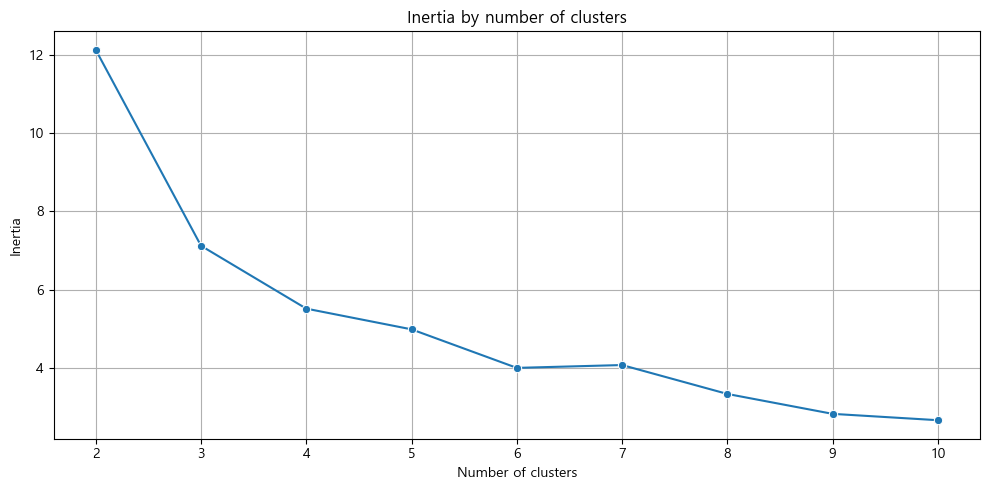

In [11]:
def my_callback(ax):
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Inertia')
    ax.set_title('Inertia by number of clusters')

my_lineplot(df=None, xname=klist, yname=inertia, marker='o', callback=my_callback)

#### (3) Elbow Point 계산

##### 변화율 계산

In [12]:
change_rates = [0]
for i in range(1, len(inertia)):
    change_rate = (inertia[i] - inertia[i-1]) / inertia[i-1]
    change_rates.append(change_rate)

change_rates

[0,
 -0.4126918645403099,
 -0.22544897152272278,
 -0.09590120678210767,
 -0.19738824794039533,
 0.01812662136586485,
 -0.18111151832680342,
 -0.1524229815192313,
 -0.057307601166606895]

##### 변화율의 평균

In [13]:
avg_change_rate = np.mean(change_rates)
avg_change_rate

-0.14490508560359028

##### 평균 변화율보다 크게 감소하는 첫 번째 지점 찾기

In [14]:
elbow_point = next((i for i, rate in enumerate(change_rates) if rate < avg_change_rate), None)
elbow_point

1

##### 최적의 군집수


In [15]:
best_k = klist[elbow_point]
best_k

3

#### (4) Elbow Point를 포함한 Inertia 시각화

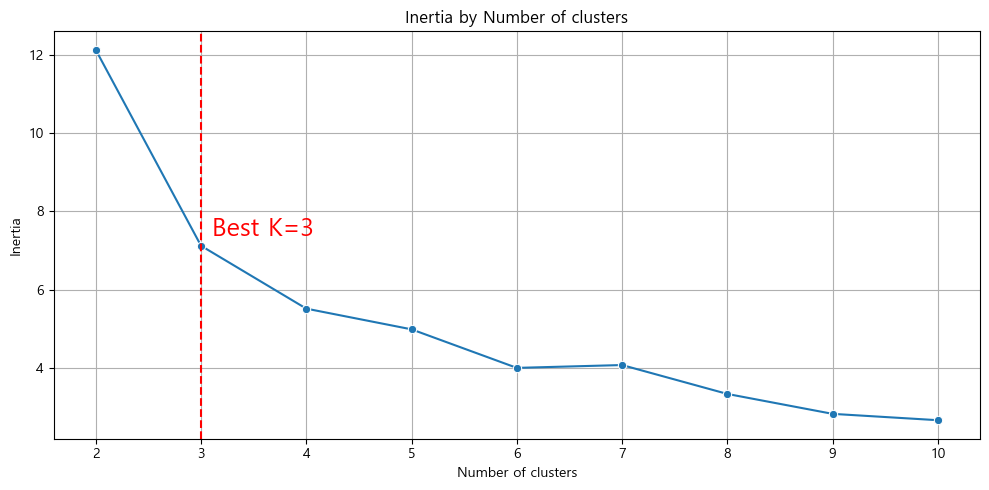

In [16]:
def my_callback(ax):
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Inertia')
    ax.set_title('Inertia by Number of clusters')
    ax.axvline(x=klist[elbow_point], color='r', linestyle='--')

    ax.text(
        klist[elbow_point]+0.1, inertia[elbow_point]+0.1, 'Best K=%d' % klist[elbow_point],
        fontsize=18, ha='left', va='bottom', color='r'
    )

my_lineplot(df=None, xname=klist, yname=inertia, marker='o', callback=my_callback)

### [2] 실루엣 점수(계수)

각 군집간의 거리가 얼마나 효율적으로 분리되었는지를 나타내는 지표

효율적 분리: 어떤 한 점이 다른 군집과는 멀리 떨어져 있고, 동일 군집끼리는 서로 가깝게 잘 뭉쳐있다는 의미

개별 데이터가 같은 군집과는 얼마나 가깝고, 다른 군집의 데이터와는 얼마나 멀리 분리되어 있는가를 나타는 값.

각각의 데이터 포인터마다 존재하는 값

sklearn은 전체 실루엣 점수의 평균값을 반환나는 `silhouette_score()`함수를 제공한다.

리턴값은 `-1~1`의 범위를 가지며 `1`에 가까울 수록 좋은 군집으로 본다.

`0`인 경우는 클러스터가 겹치는 것을 의미

음수값은 일반적으로 샘플이 잘못된 클러스터에 할당되었음을 의미.

#### (1) 각 데이터 포인트의 실루엣 계수 계산

In [17]:
silhouette_samples(X=df2, labels=cluster, metric='euclidean')

array([ 0.78701723,  0.69586592,  0.75250587,  0.71317527,  0.78078367,
        0.65681427,  0.75011161,  0.78745107,  0.62267165,  0.72790959,
        0.7293276 ,  0.7755547 ,  0.69672265,  0.64940609,  0.61224143,
        0.5142121 ,  0.67321611,  0.77957314,  0.63458222,  0.73360312,
        0.72200261,  0.73538029,  0.74175235,  0.68172602,  0.74667052,
        0.67889465,  0.74960528,  0.77545544,  0.77412055,  0.74327907,
        0.72340269,  0.70296235,  0.65762561,  0.6098884 ,  0.73009783,
        0.75619719,  0.72369023,  0.77230596,  0.66092925,  0.7826502 ,
        0.78250498,  0.35309121,  0.70848273,  0.67348751,  0.68629852,
        0.68216201,  0.73568844,  0.74041224,  0.74426108,  0.77835656,
        0.16992727, -0.03497206,  0.22511212,  0.57019439,  0.16294175,
        0.56558978,  0.09788458,  0.38888417,  0.19131874,  0.55486119,
        0.42734286,  0.40729873,  0.5091451 ,  0.37893421,  0.54623751,
       -0.03852522,  0.42921743,  0.57959325,  0.38315083,  0.60

#### (2) 전체 데이터의 실루엣 계수에 대한 평균 스코어

보통 `0.5`가 넘으면 꽤 좋은 수치라고 함

In [18]:
silhouette_score(X=df2, labels=cluster, metric='euclidean')

0.48292893354301647

#### (3) 실루엣 스코어 시각화

> 출처: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

In [19]:
def visualize_silhouette(estimator, X_features, cluster_labels, n_cluster): 
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

    sil_avg = silhouette_score(X=X_features, labels=cluster_labels)
    sil_values = silhouette_samples(X=X_features, labels=cluster_labels)

    y_lower = 10
    plt.suptitle('Number of Cluster : '+ str(n_cluster)+', ' \
                        'Silhouette Score :' + str(round(sil_avg,3)) )
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

    # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
    for i in range(n_cluster):
        ith_cluster_sil_values = sil_values[cluster_labels==i]
        ith_cluster_sil_values.sort()

        size_cluster_i = ith_cluster_sil_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                            facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.axvline(x=sil_avg, color="red", linestyle="--")


      # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_cluster)
    ax2.scatter(
        X_features[X_features.columns[0]], X_features[X_features.columns[1]], marker="o", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = estimator.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="r",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.show()
    plt.close()

In [20]:
def visualize_silhouette(estimator, X_features, cluster_labels, n_cluster): 
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

    sil_avg = silhouette_score(X=X_features, labels=cluster_labels)
    sil_values = silhouette_samples(X=X_features, labels=cluster_labels)

    y_lower = 10
    plt.suptitle('Number of Cluster : '+ str(n_cluster)+', ' \
                        'Silhouette Score :' + str(round(sil_avg,3)) )
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

    # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
    for i in range(n_cluster):
        ith_cluster_sil_values = sil_values[cluster_labels==i]
        ith_cluster_sil_values.sort()

        size_cluster_i = ith_cluster_sil_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                            facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.axvline(x=sil_avg, color="red", linestyle="--")


      # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_cluster)
    ax2.scatter(
        X_features[X_features.columns[0]], X_features[X_features.columns[1]], marker="o", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = estimator.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="r",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.show()
    plt.close()



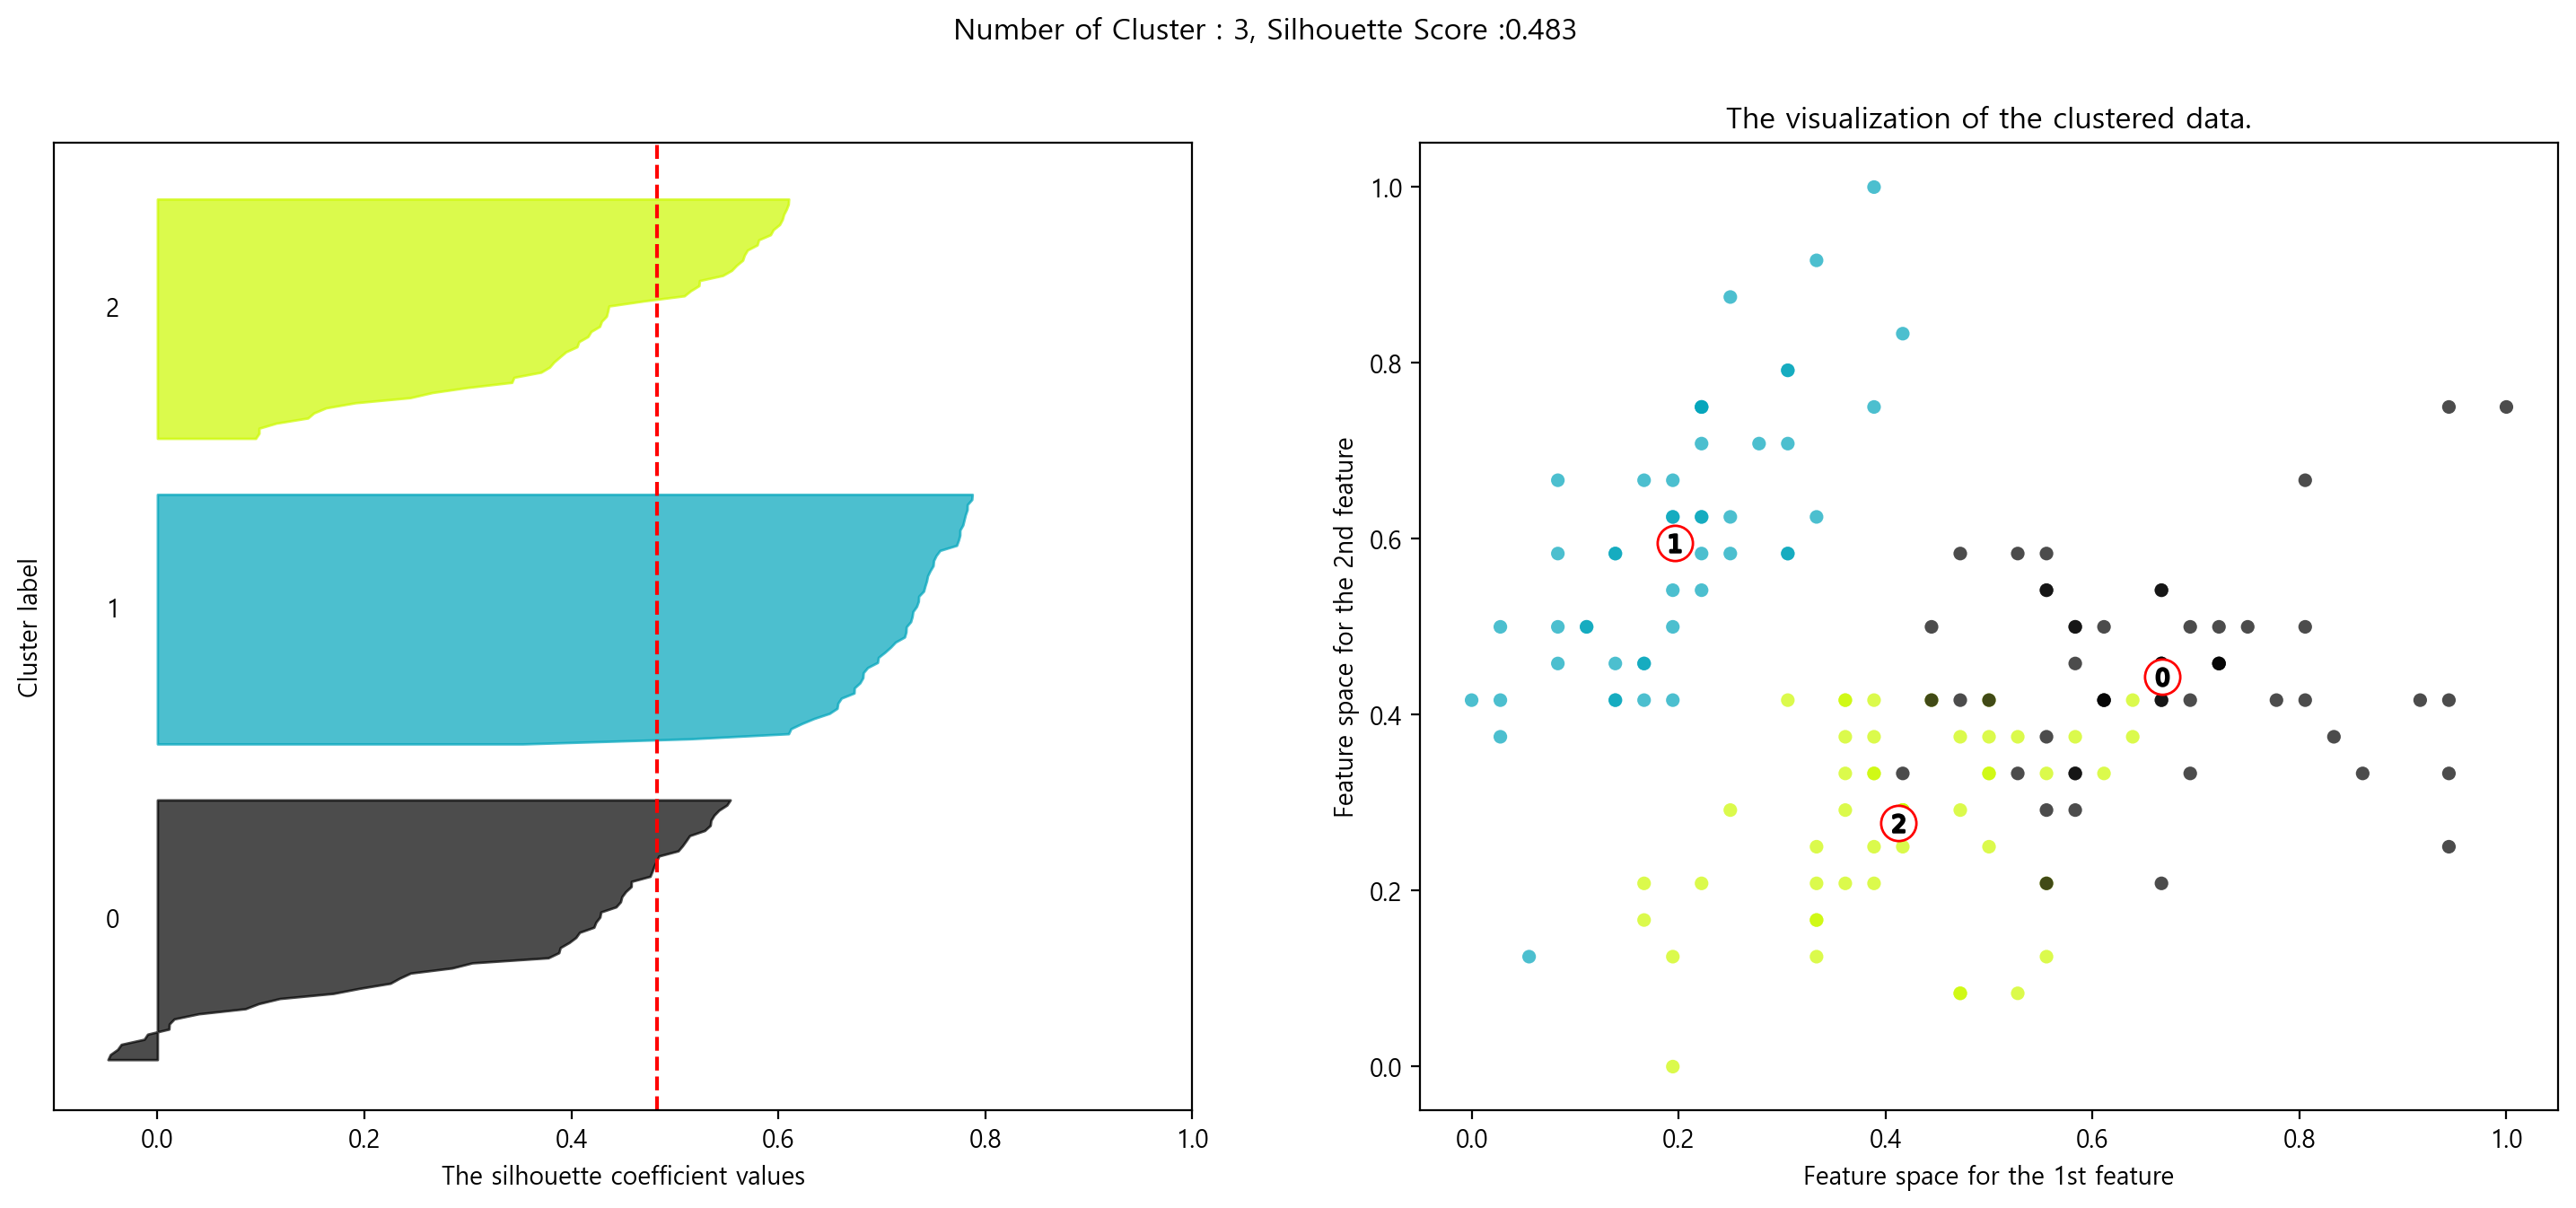

In [21]:
estimator = KMeans(n_clusters=best_k, random_state=333)
estimator.fit(X=df2)

visualize_silhouette(estimator=estimator, X_features=df2, cluster_labels=cluster, n_cluster=klist[elbow_point])

#### (4) `2~10`까지 클러스터 수를 늘리면서 실루엣 점수 수집

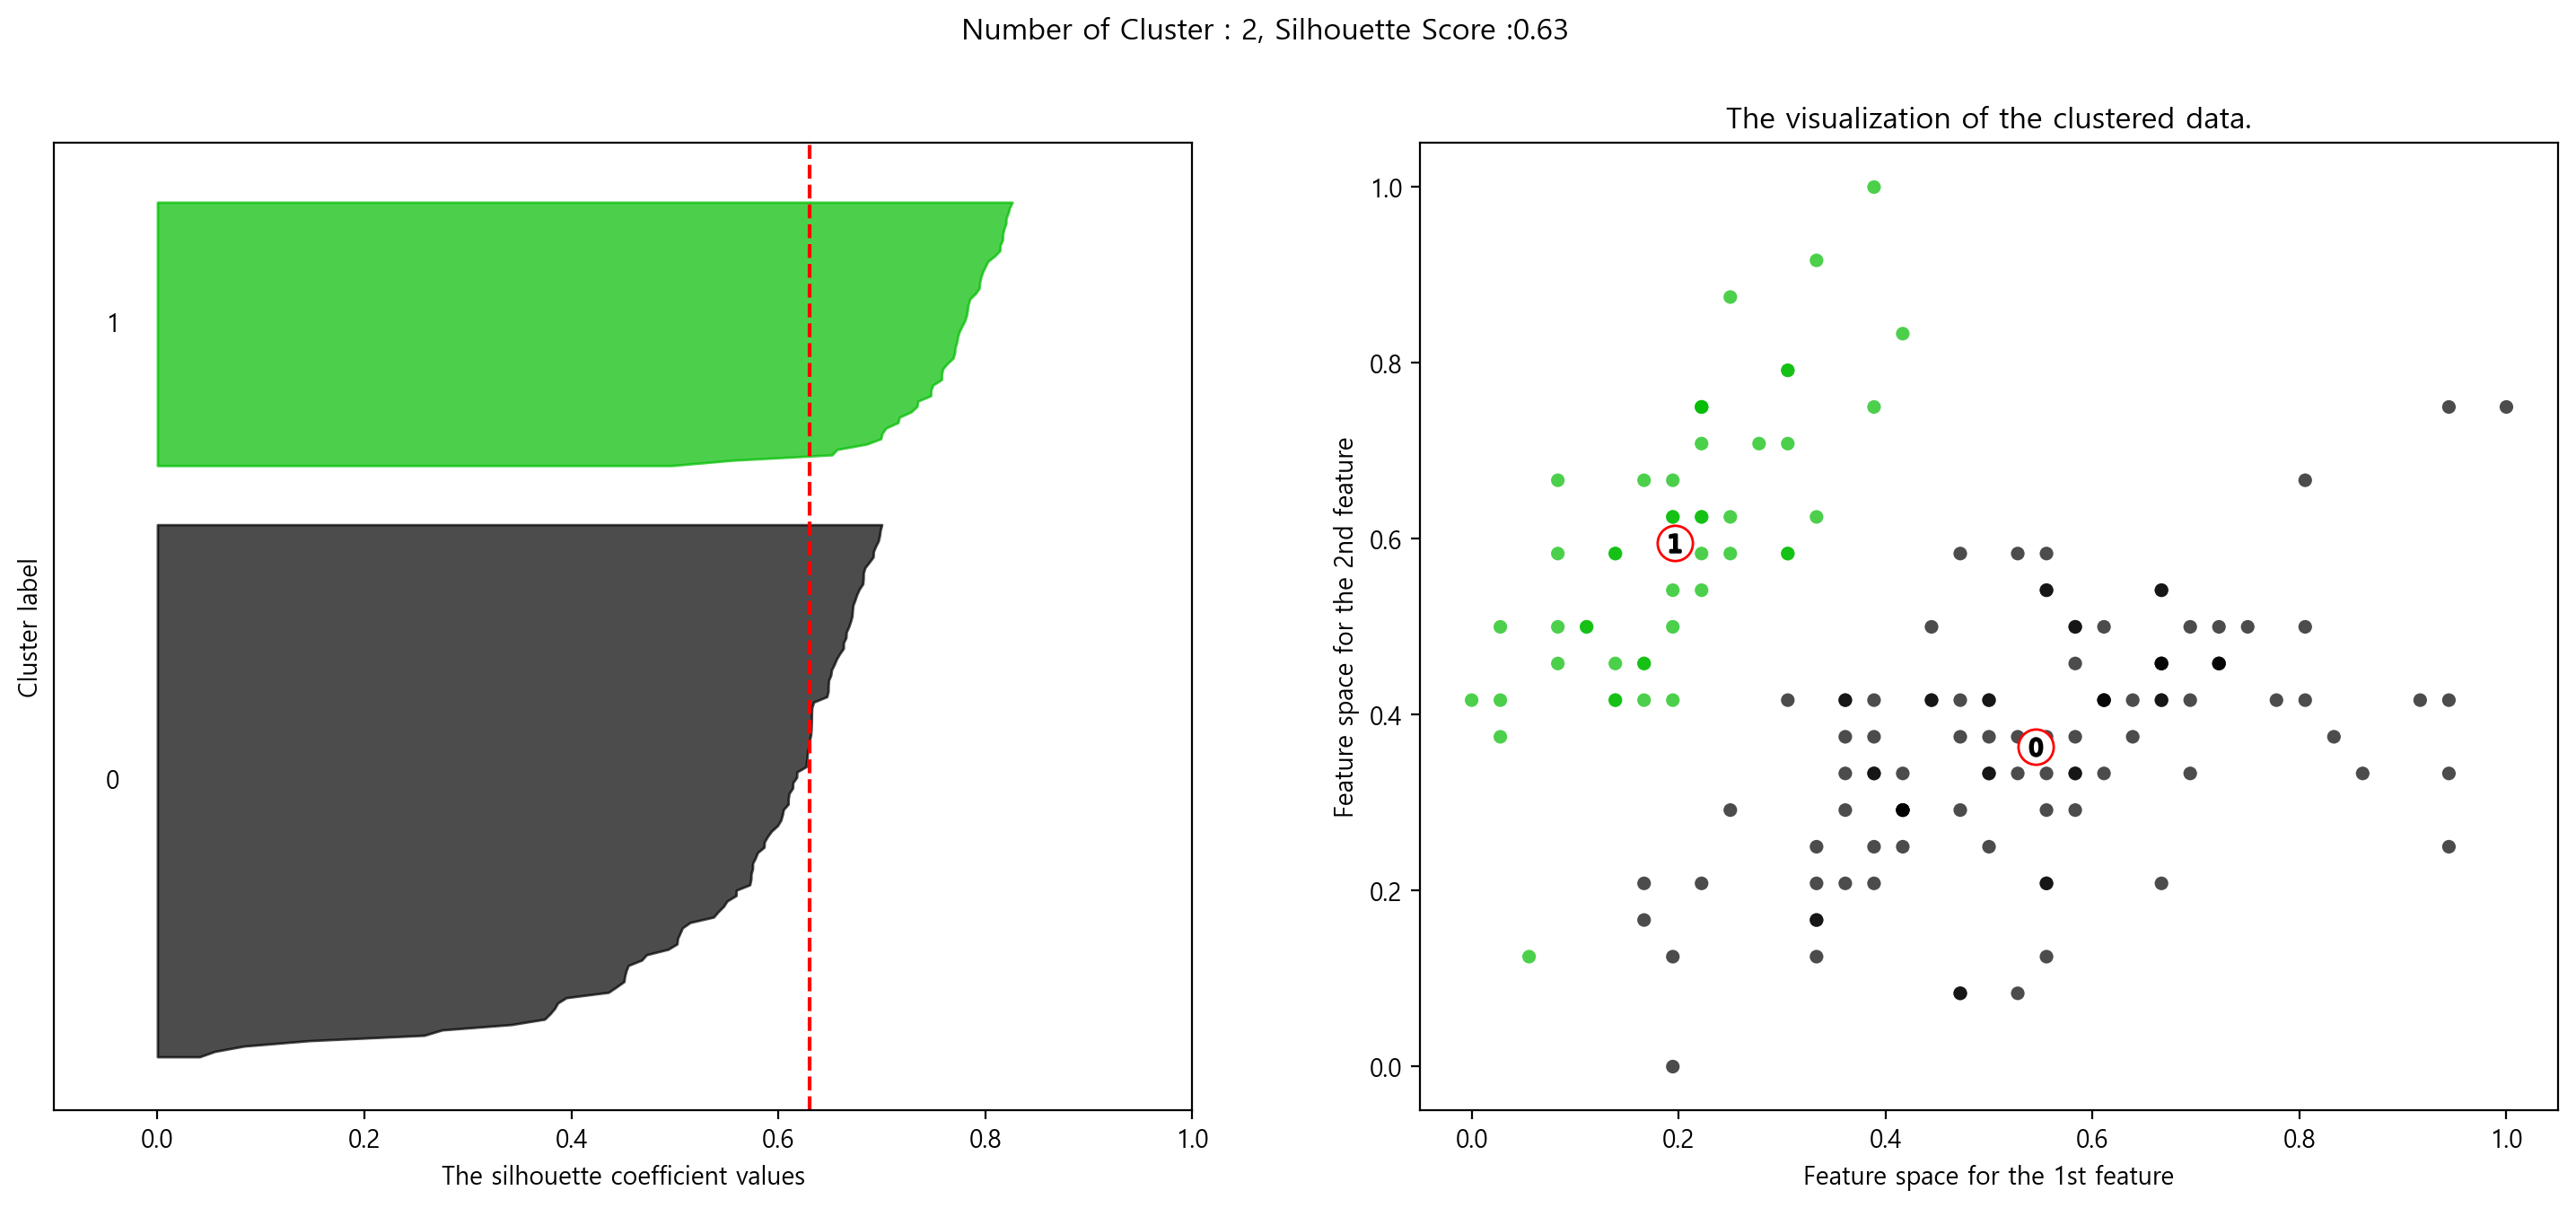

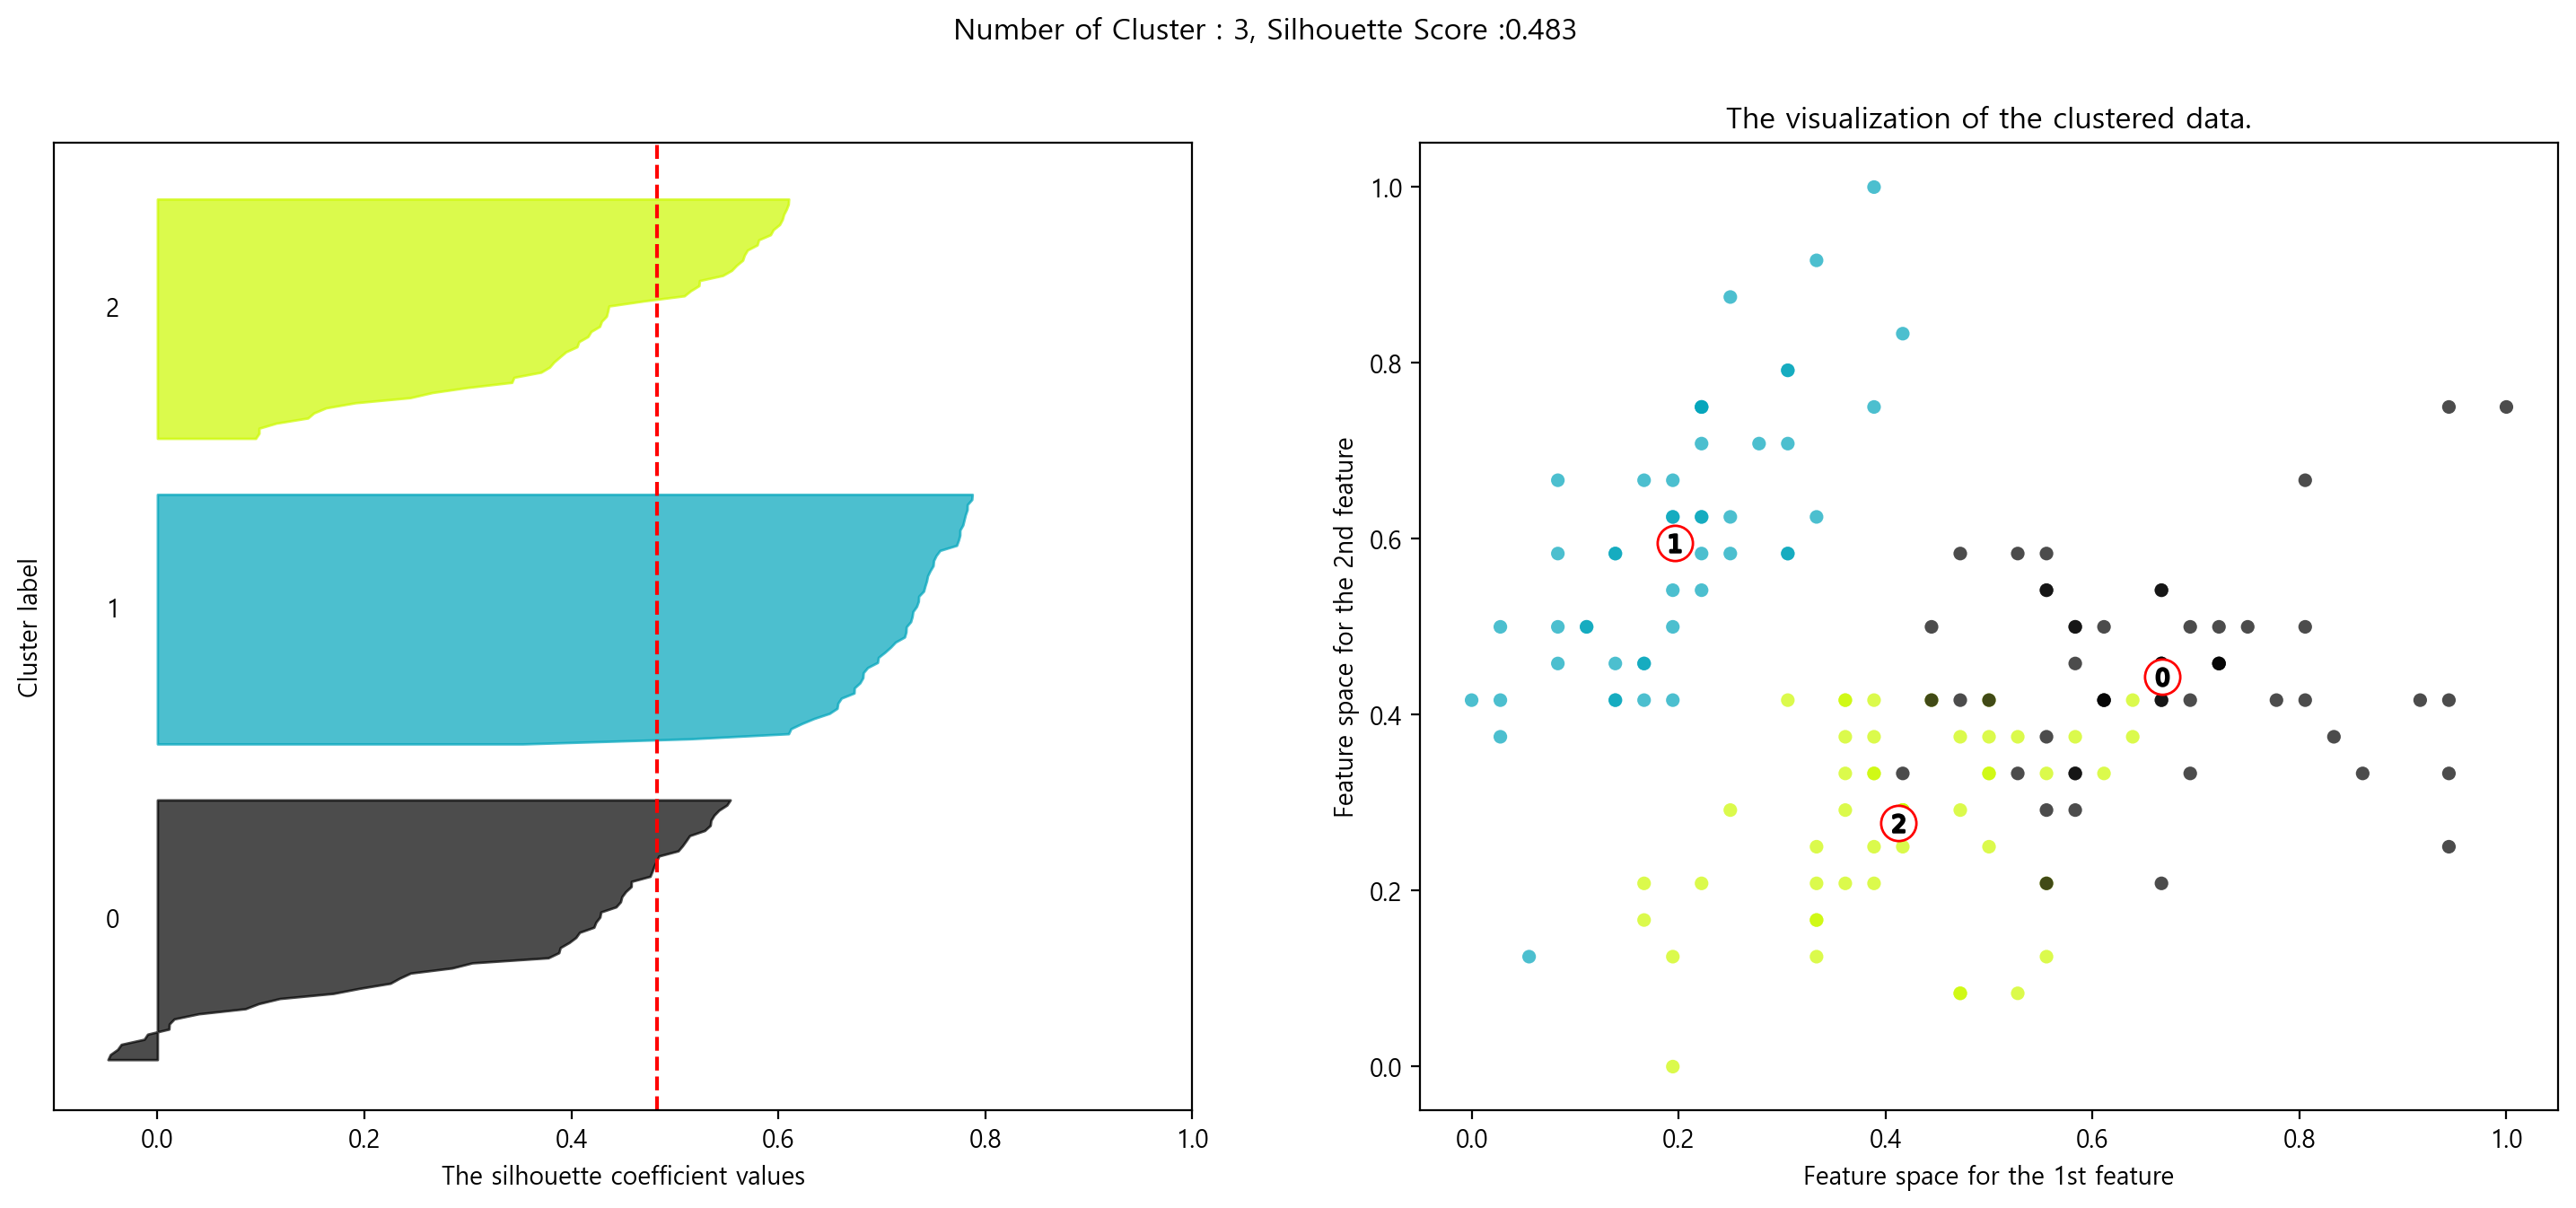

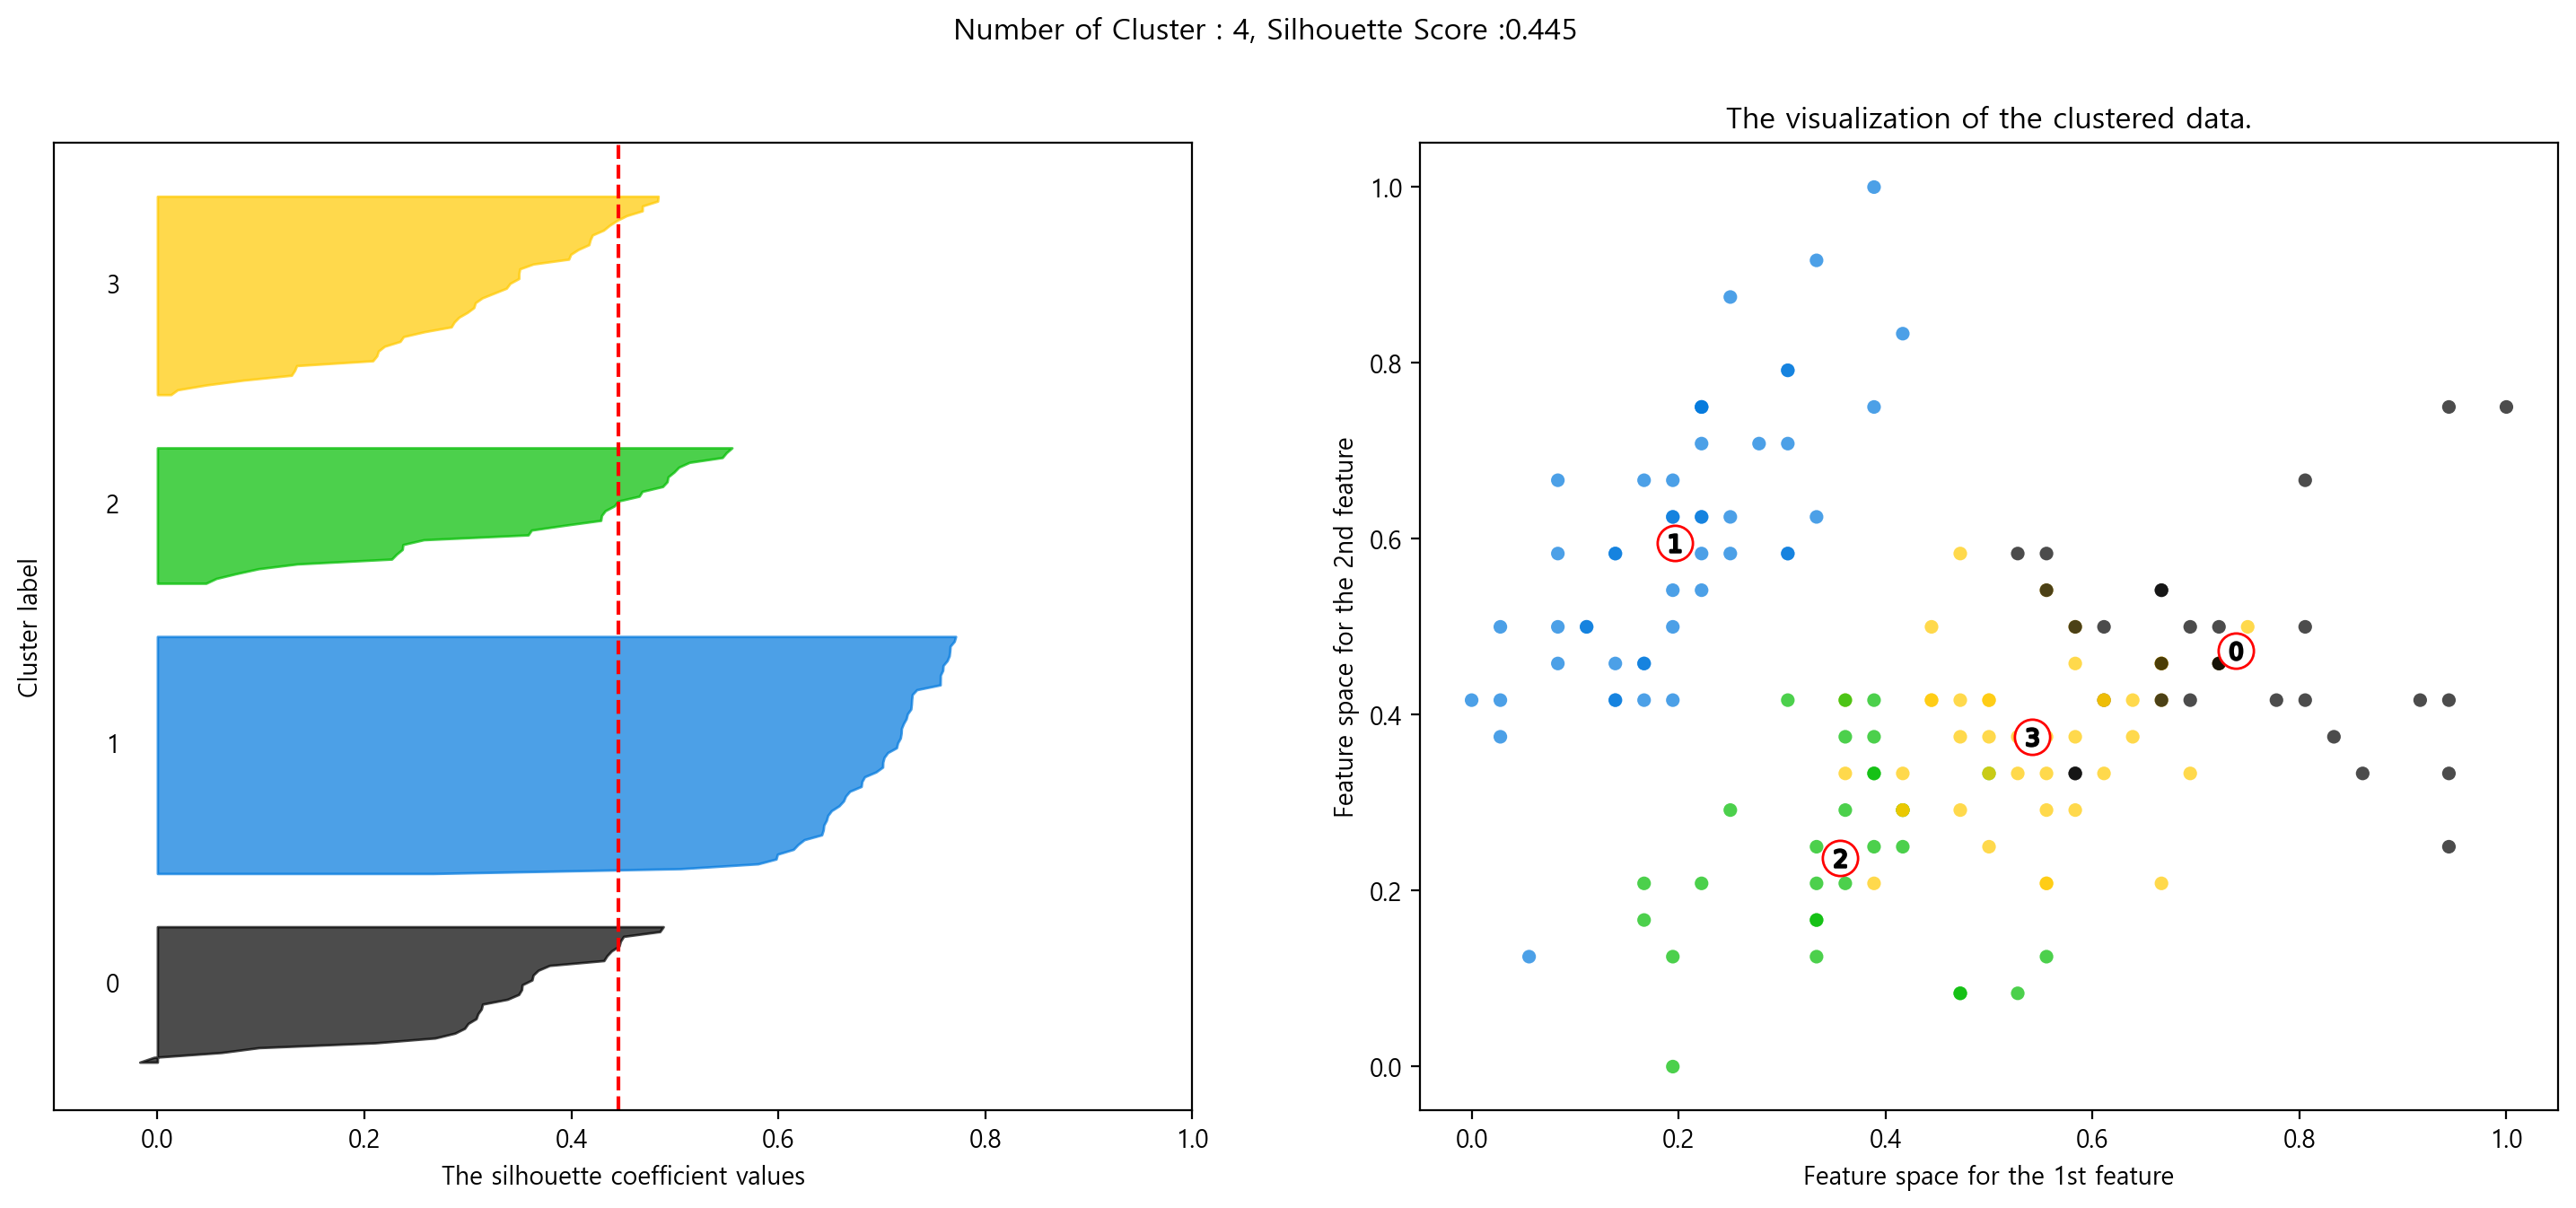

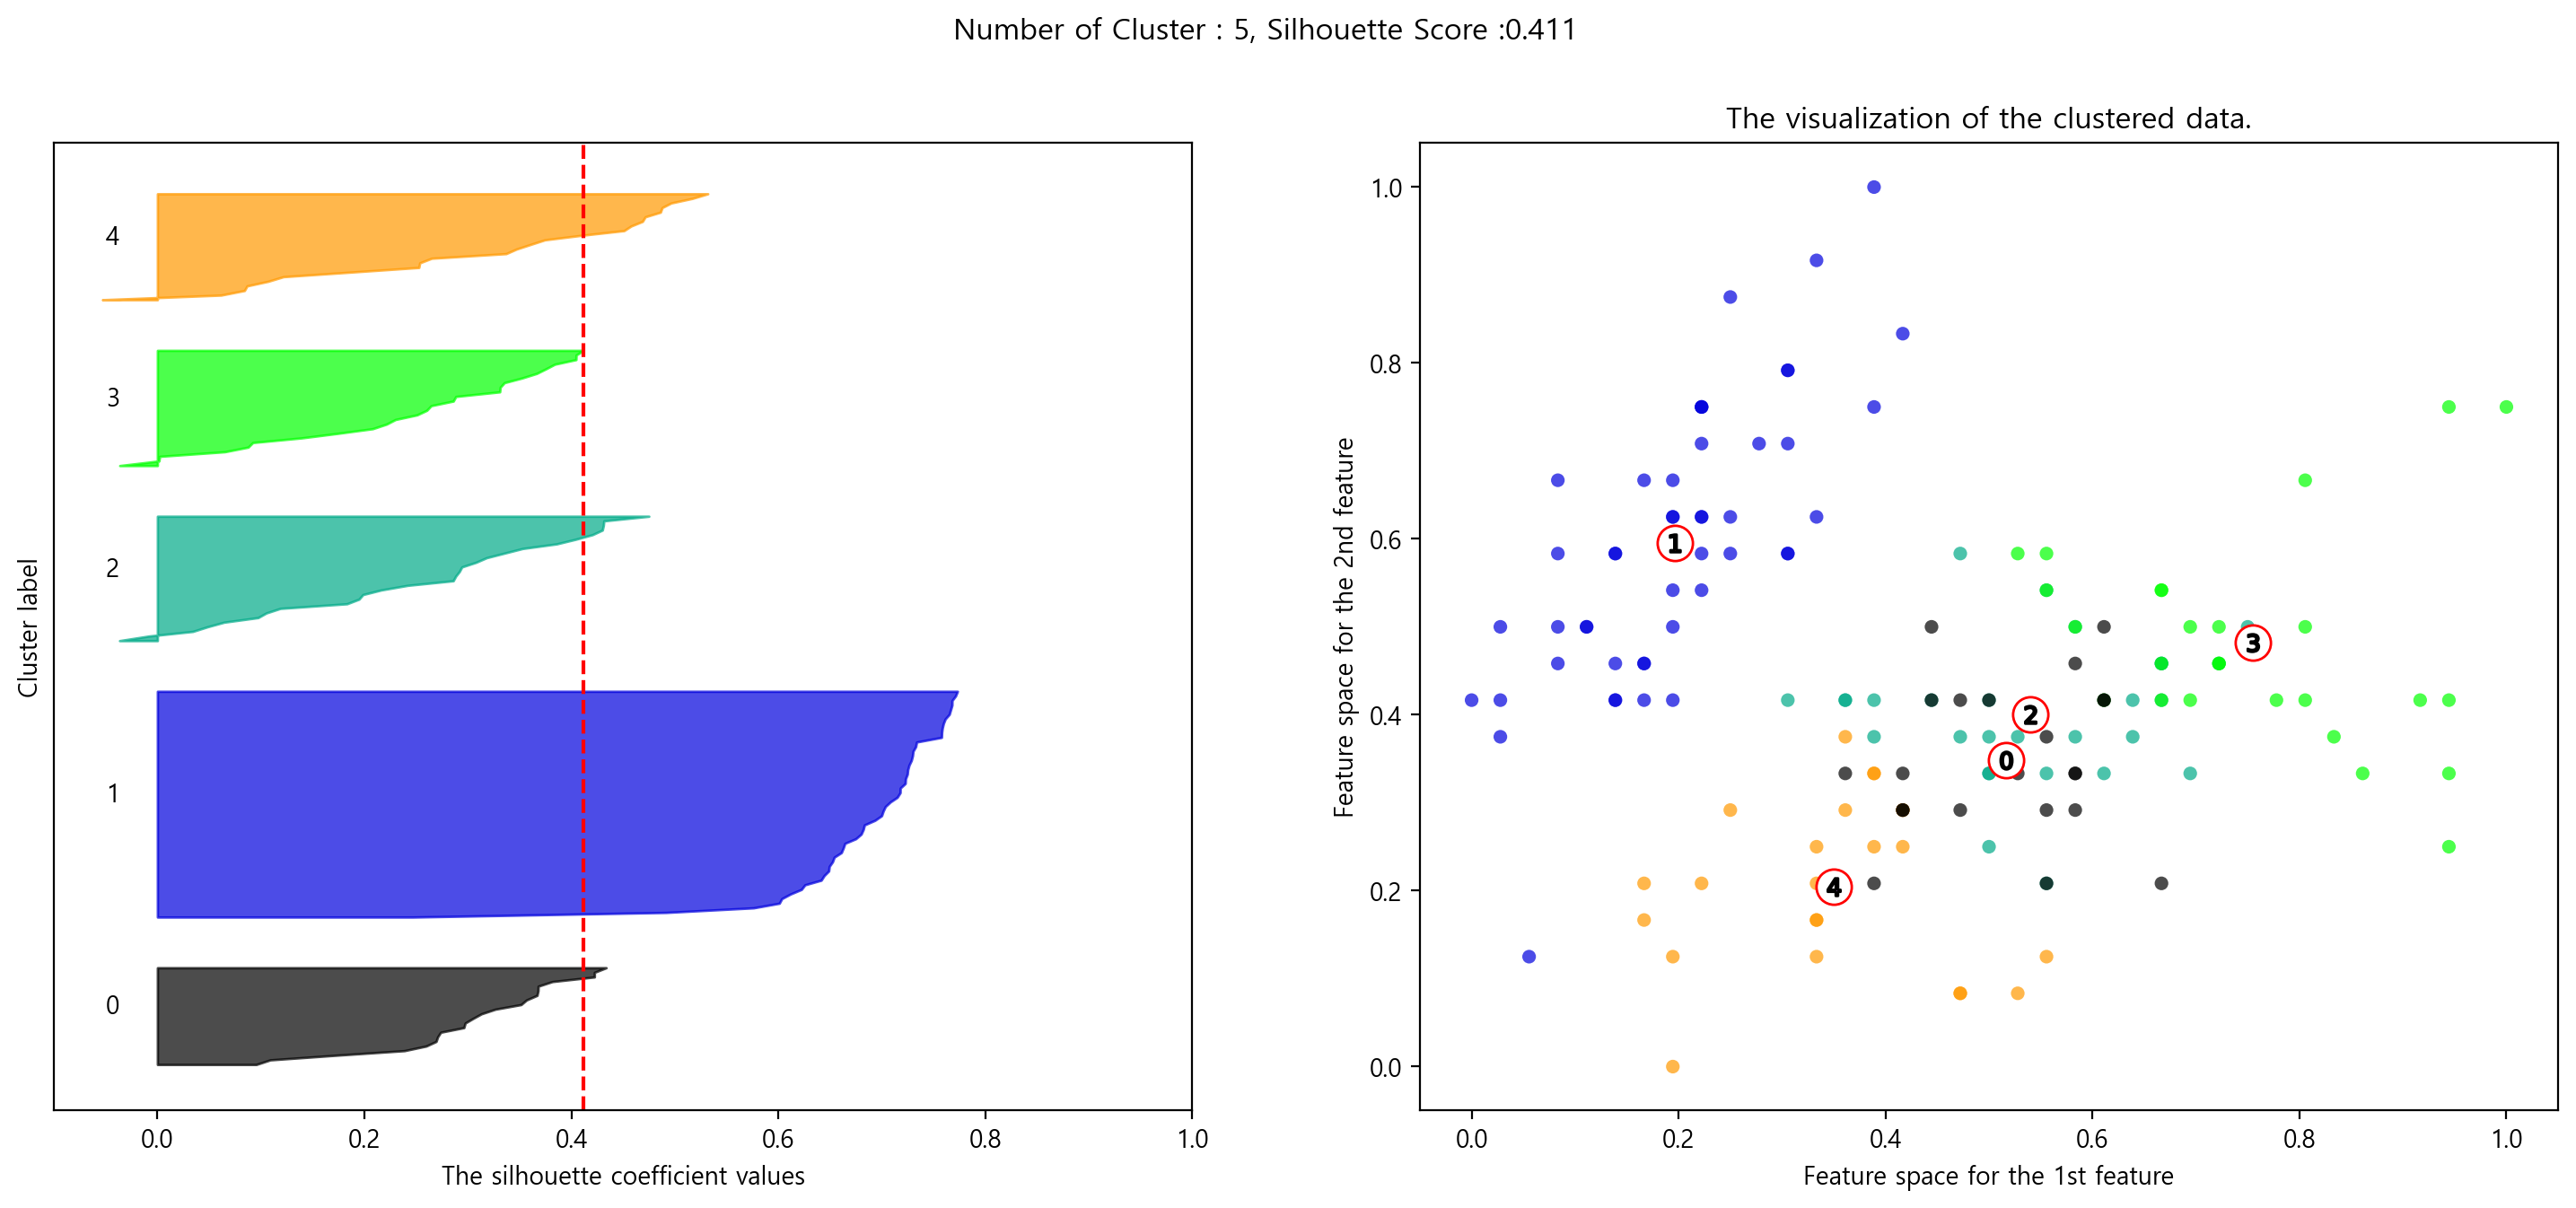

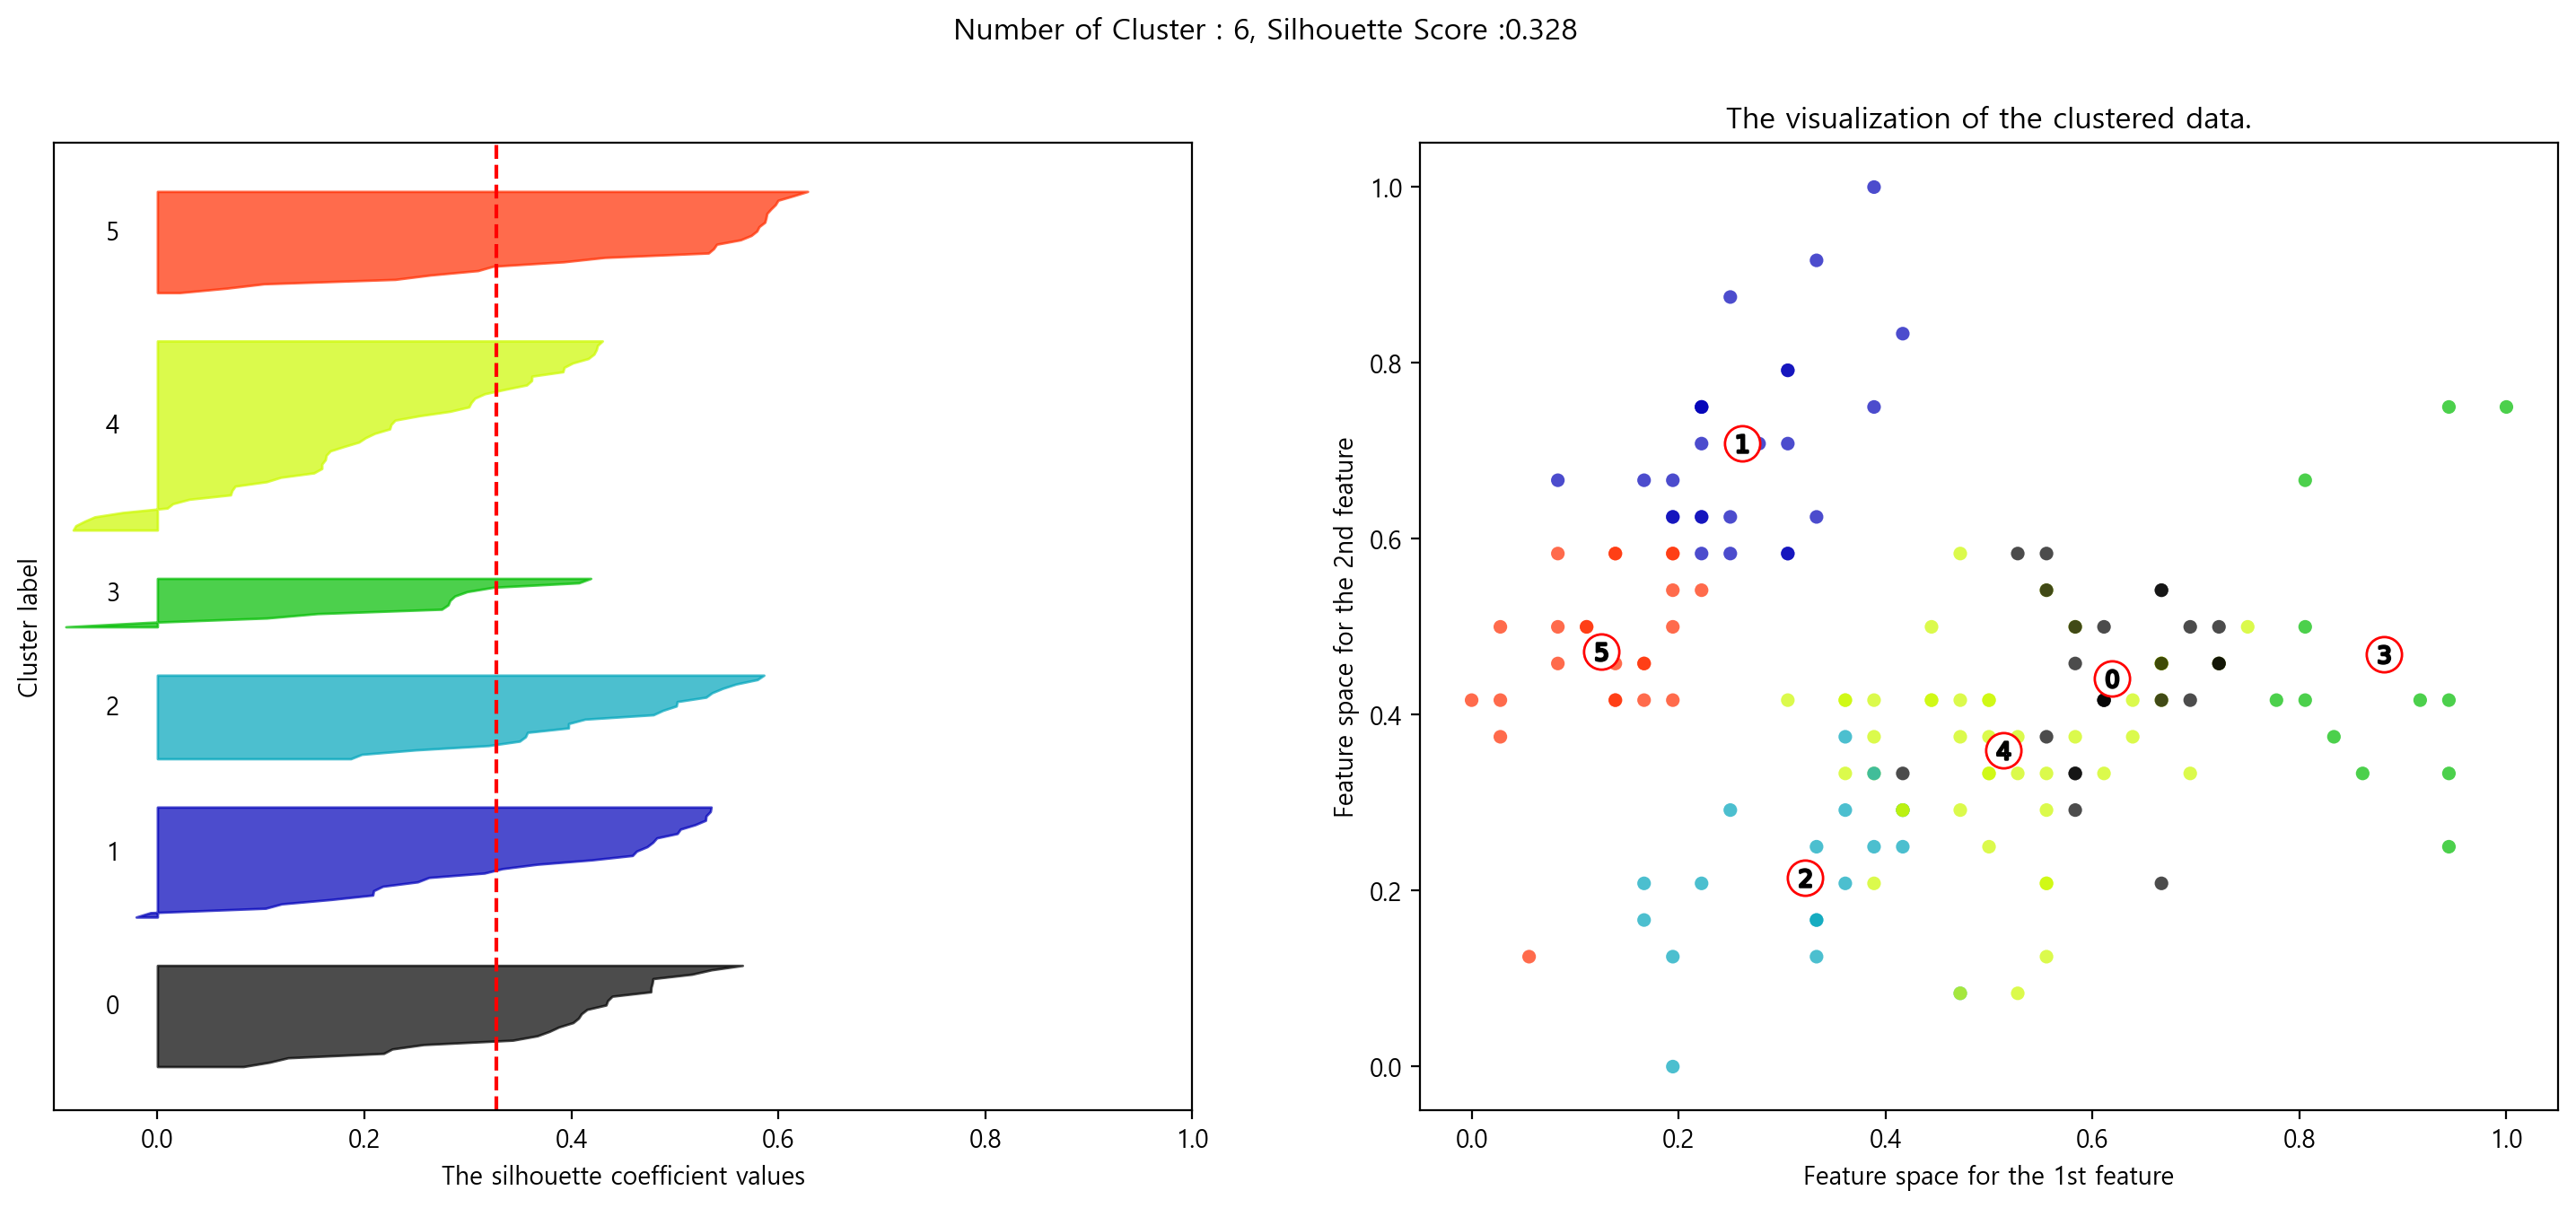

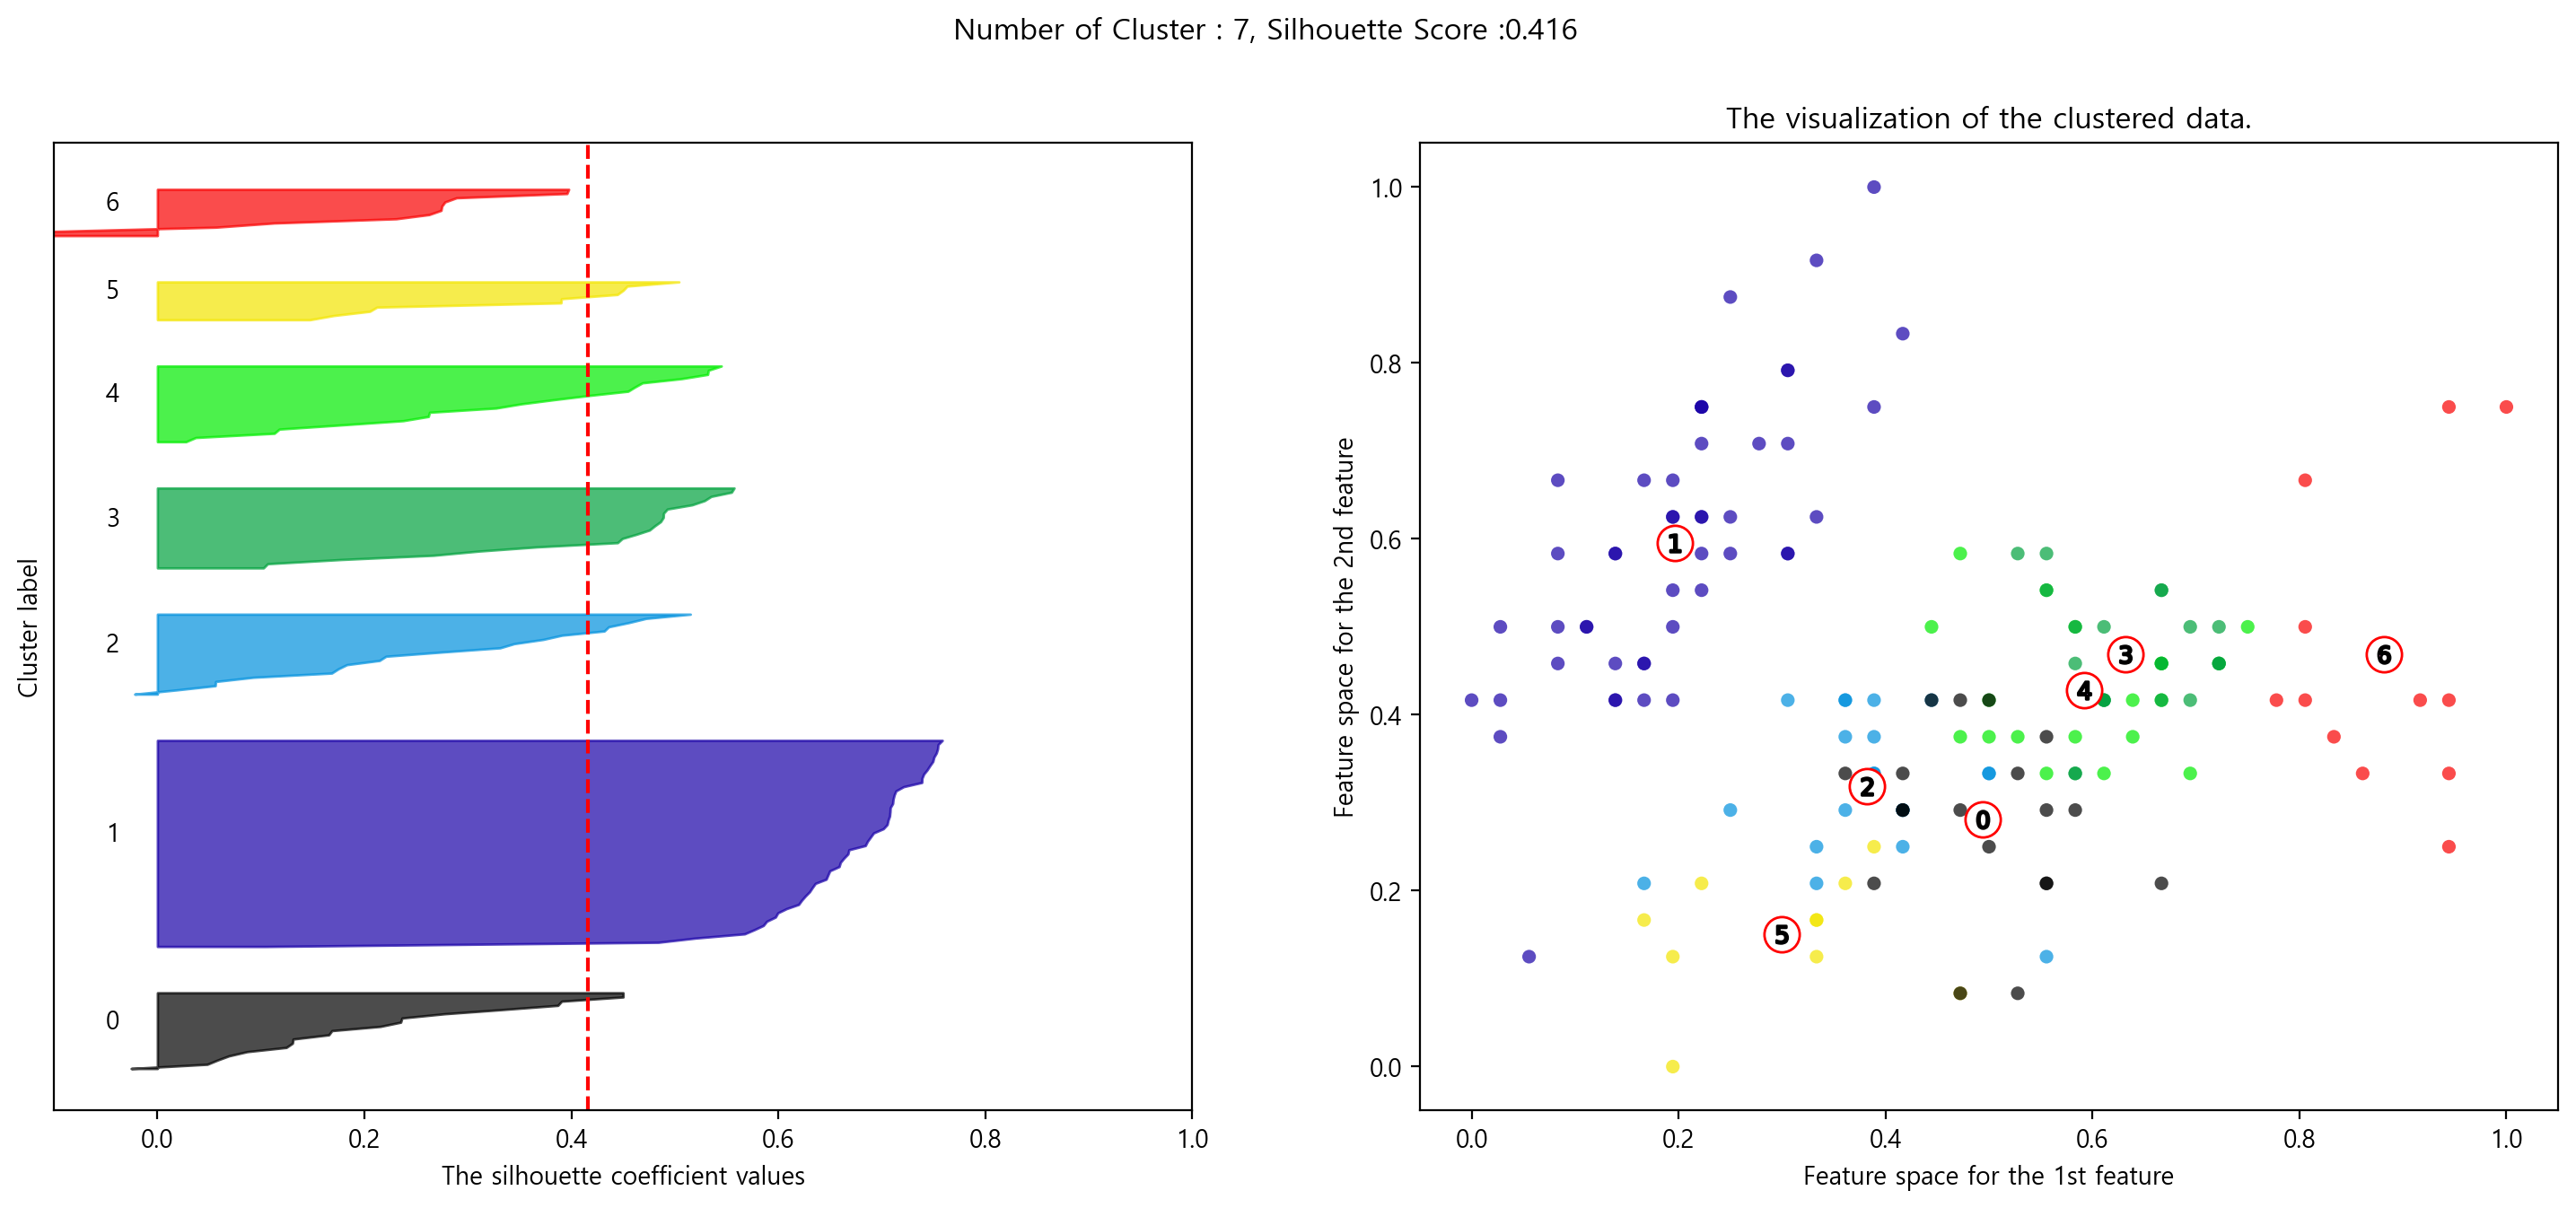

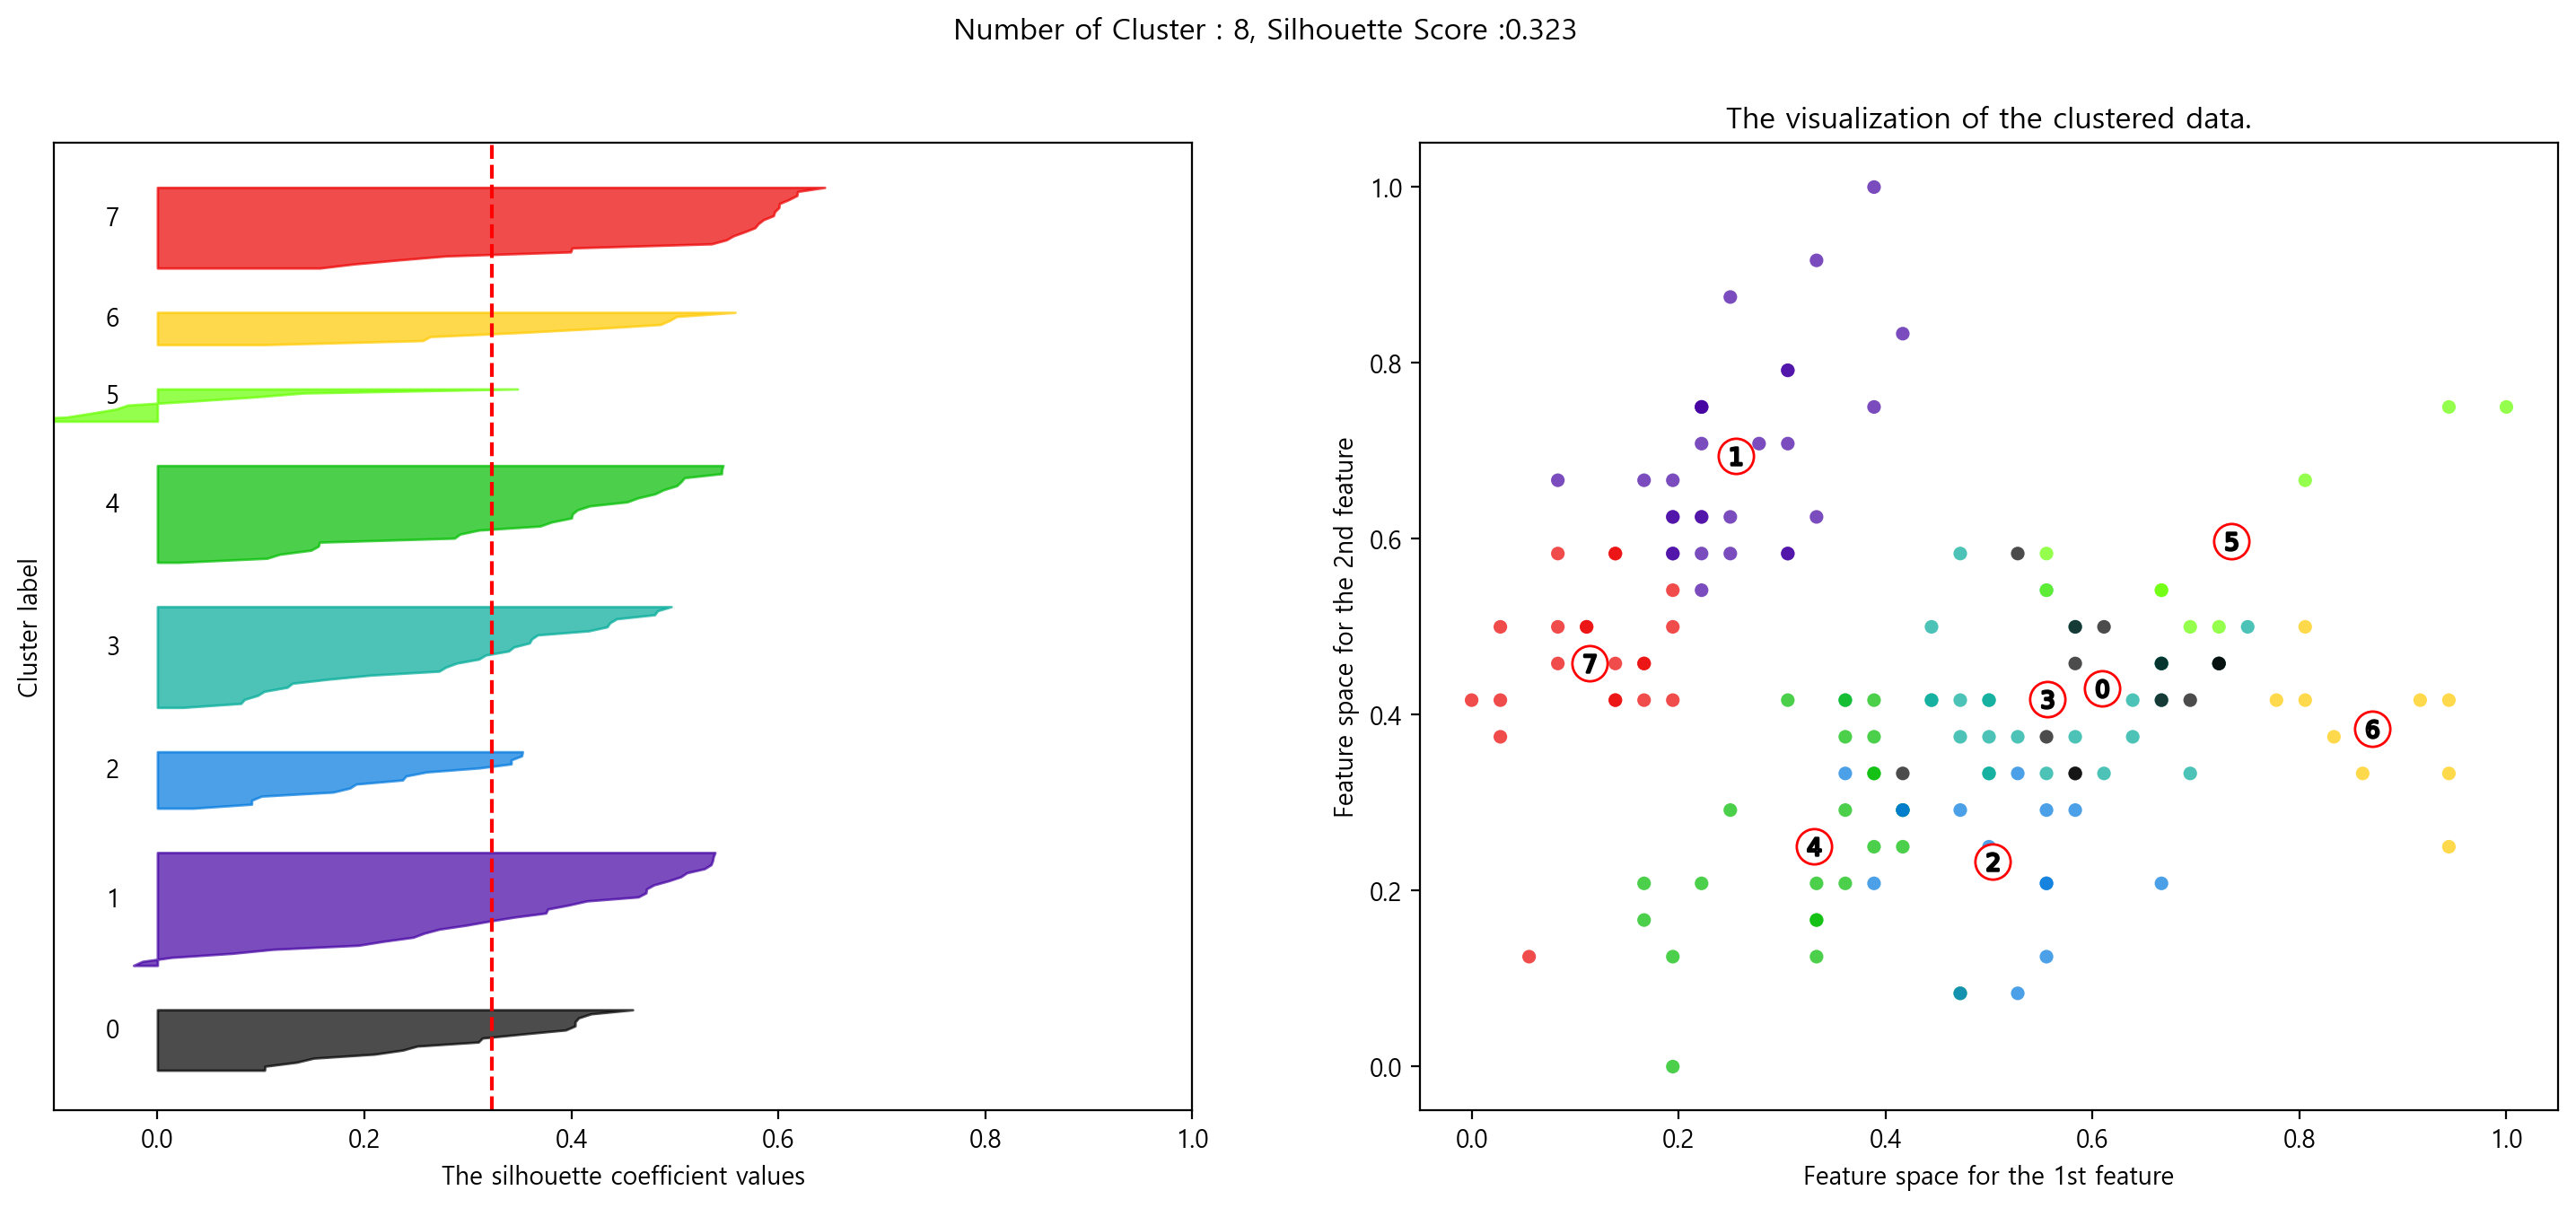

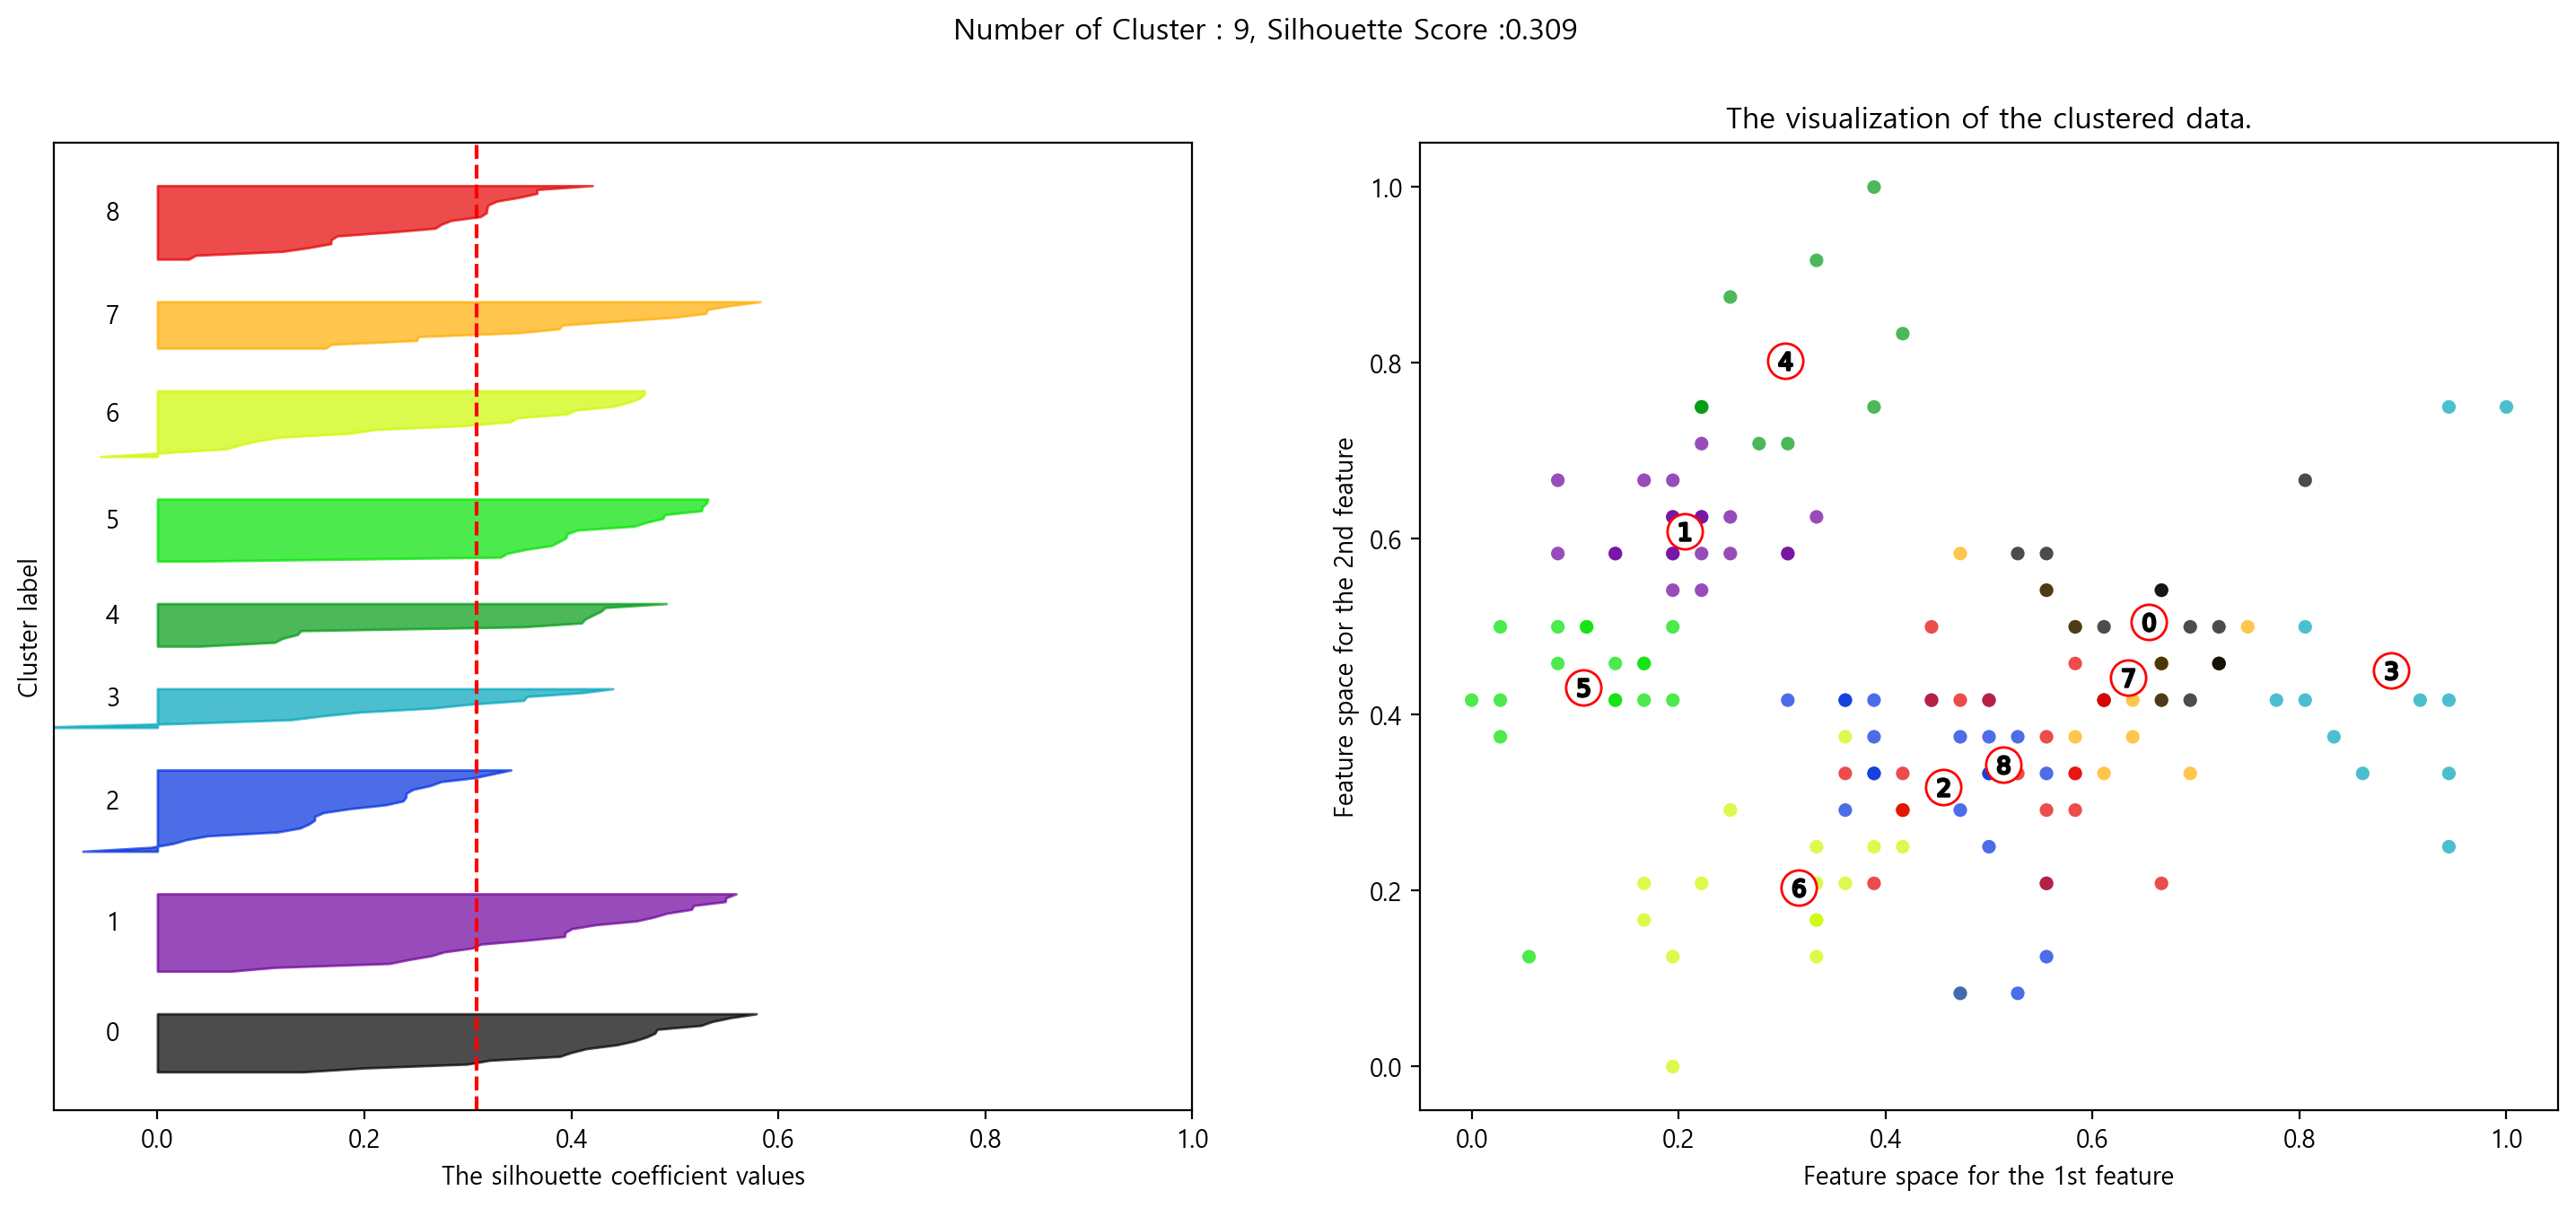

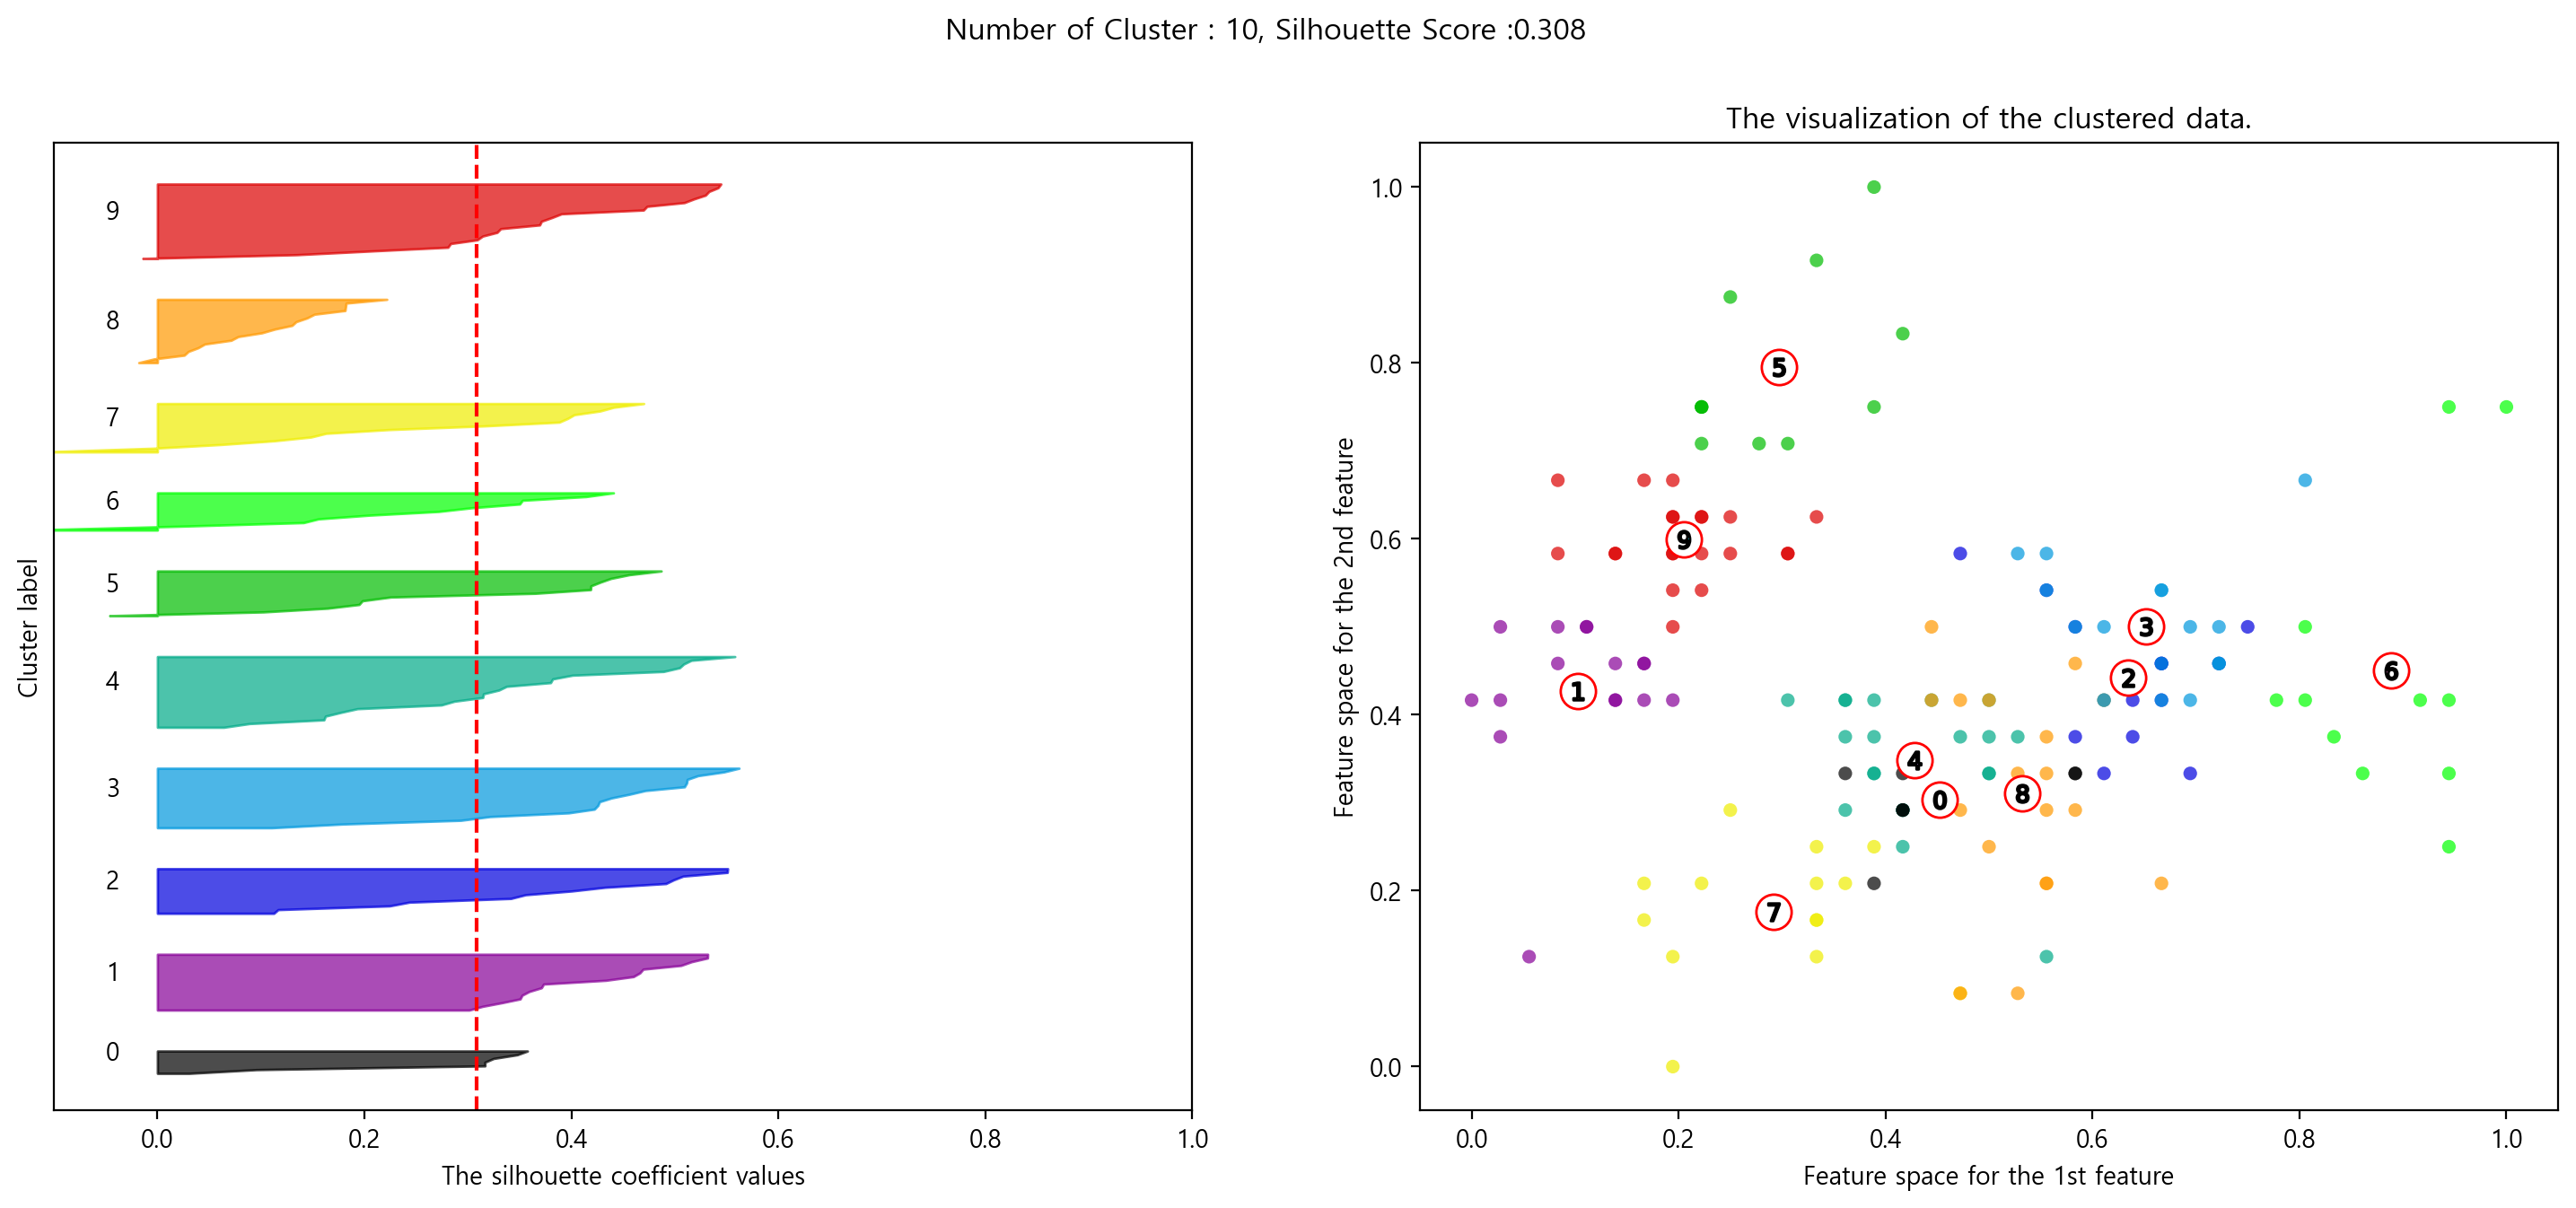

In [22]:
klist = list(range(2,11))
silhouette=[]

for k in klist:
    estimator = KMeans(n_clusters=k, random_state=333)
    estimator.fit(X=df2)
    cluster=estimator.predict(df2)
    silhouette.append(silhouette_score(X=df2, labels=cluster, metric='euclidean'))

    visualize_silhouette(estimator=estimator, X_features=df2, cluster_labels=cluster, n_cluster=k)

## #05. 최종 모형

> 최적의 군집 수를 `3`으로 채택함

### [1] 군집분석 수행

In [24]:
estimator = KMeans(n_clusters=3, random_state=333)
estimator.fit(X=df2)
cluster = estimator.predict(df2)

result_df = df2.copy()
result_df['cluster'] = cluster

### [2] 군집 시각화

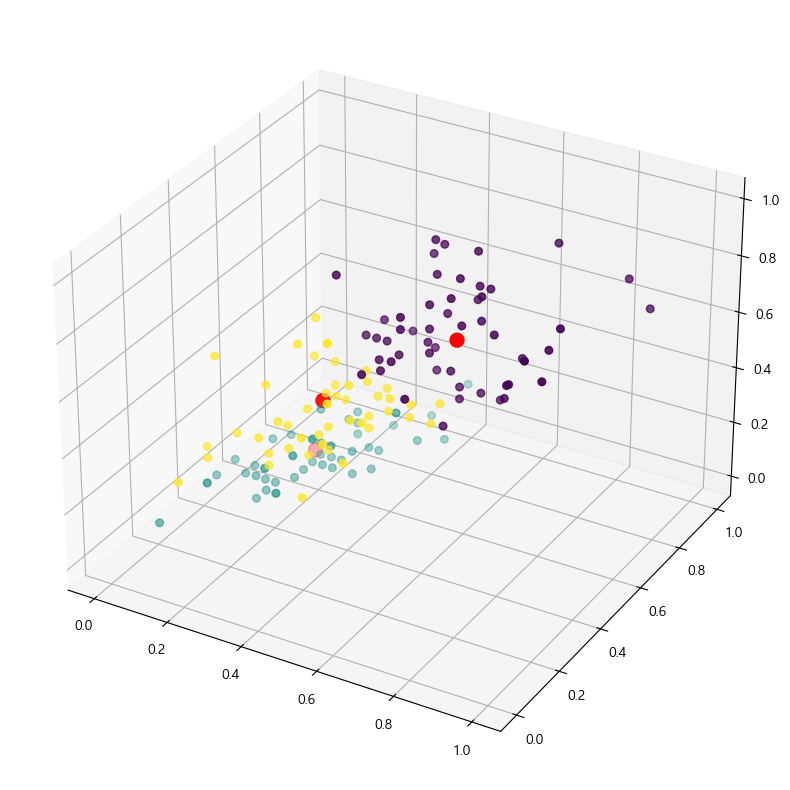

In [25]:
fig = plt.figure(figsize=(10, 10), dpi=100)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = result_df['Sepal.Length'],
        ys = result_df['Sepal.Width'],
        zs = result_df['Petal.Width'],
        c = result_df['cluster'], s=30)

ax.scatter(xs = estimator.cluster_centers_[:, 0],
            ys = estimator.cluster_centers_[:, 1],
            zs = estimator.cluster_centers_[:, 2],
            c='red', s=100)

plt.show()
plt.close()